<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/DrawChartsMassGathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange">**Draw Charts Mass Gathering**</span>

## 1. **Compare Statistics of Time Series**

### 1.1. **Draw and Save Charts of Time Series**

#### 1.1.1. All

Available Headers:
['time(s)', 'Duration(s)', 'ElapsedTime(s)', 'TotalPopulation', 'TotalInfected', 'Area(m²)', 'Density(p/m²)', 'TotalParticles', 'MaximumProbableContacts', 'CalculateDecay', 'CharacteristicTime(s)', 'MotionRadius', 'Atleast1pWake', 'Atleast1pCircular', 'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode', 'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis', 'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode', 'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis', 'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode', 'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis', 'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'ParticlesCircularNZeroMin', 'ParticlesCircularNZeroMedian

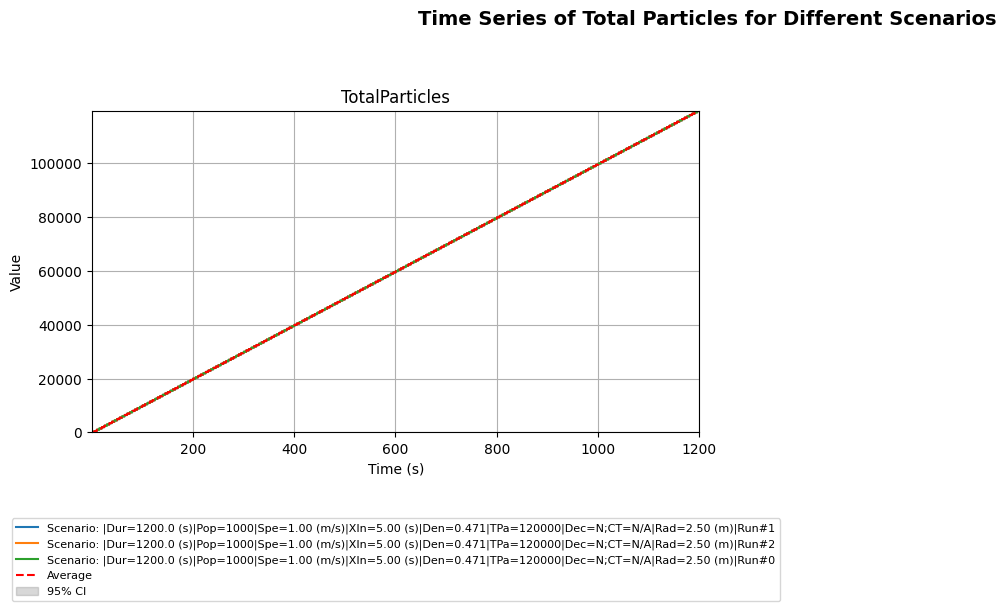

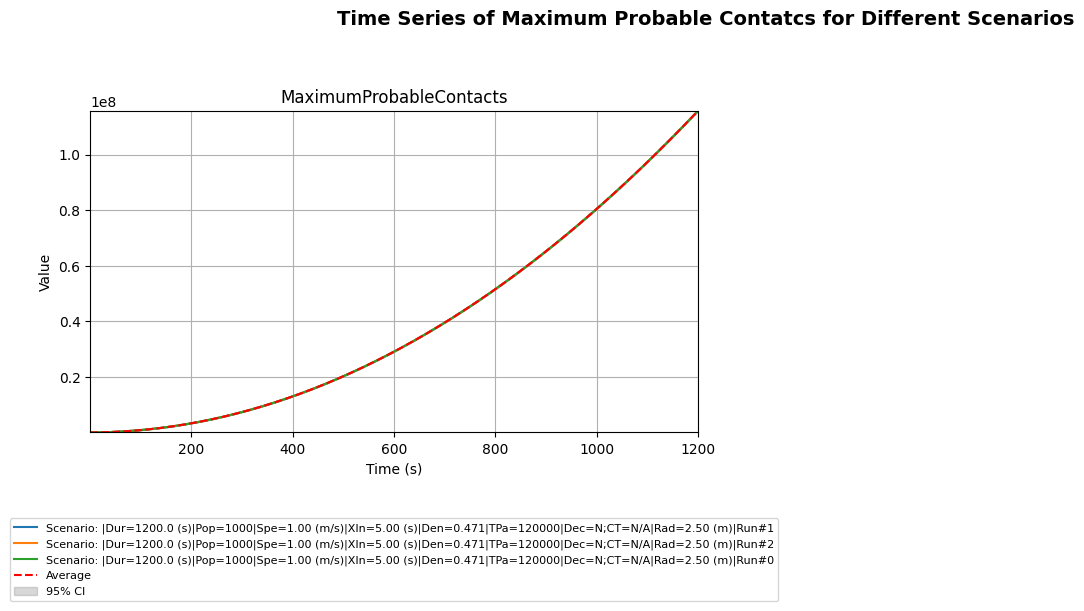

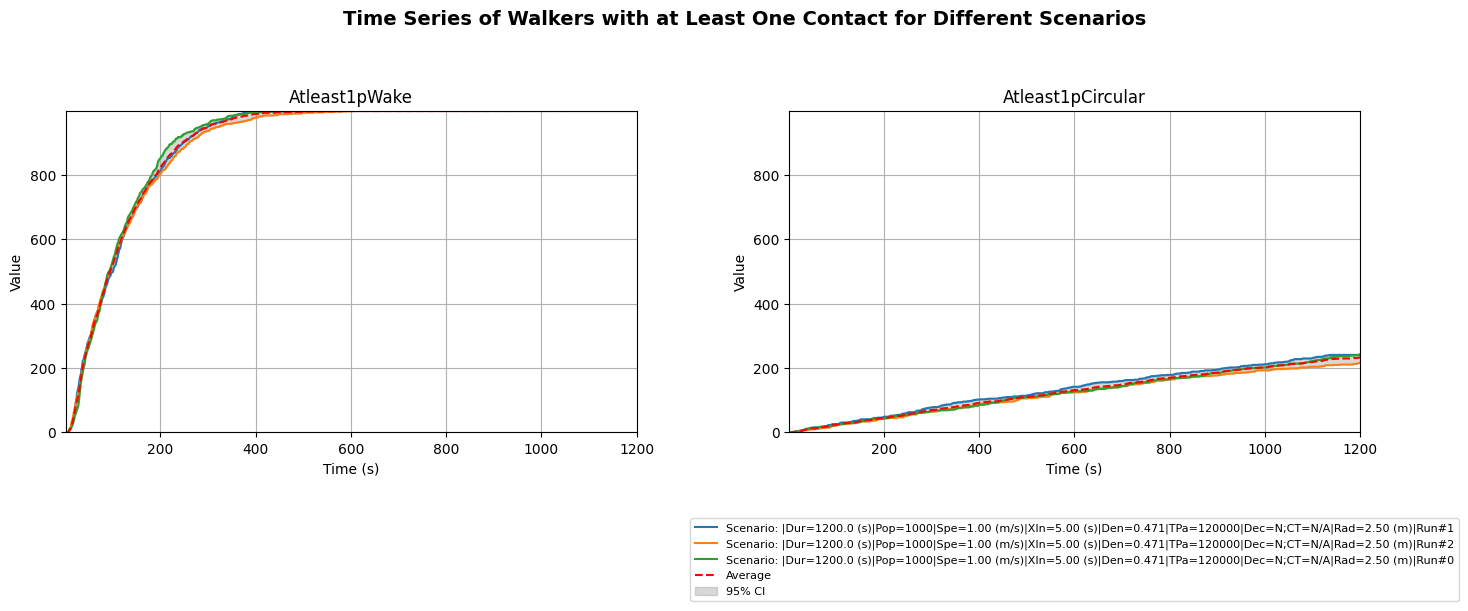

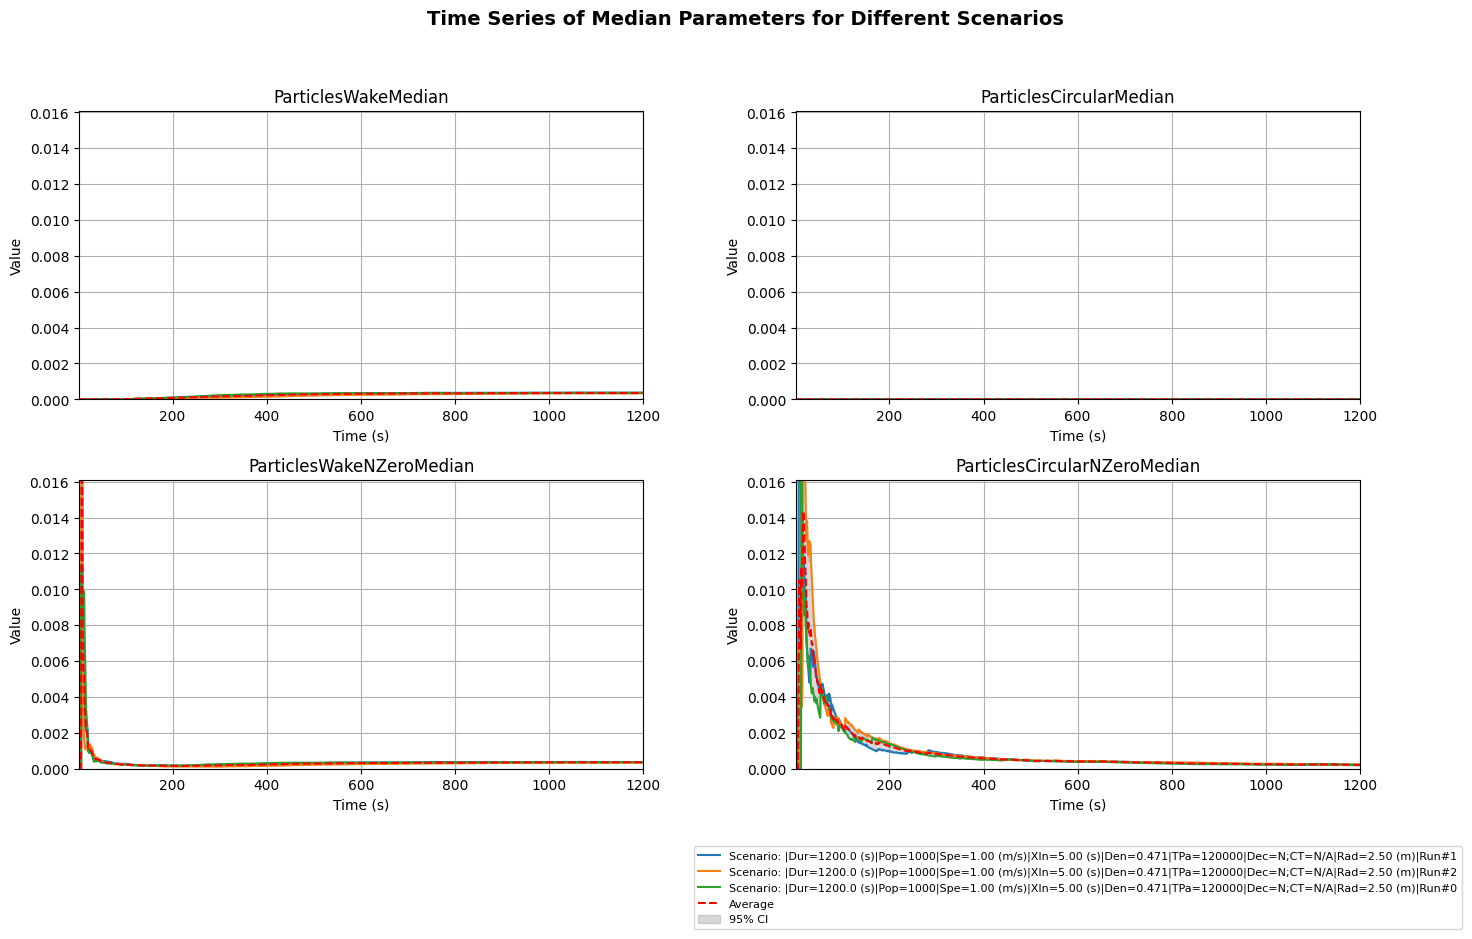

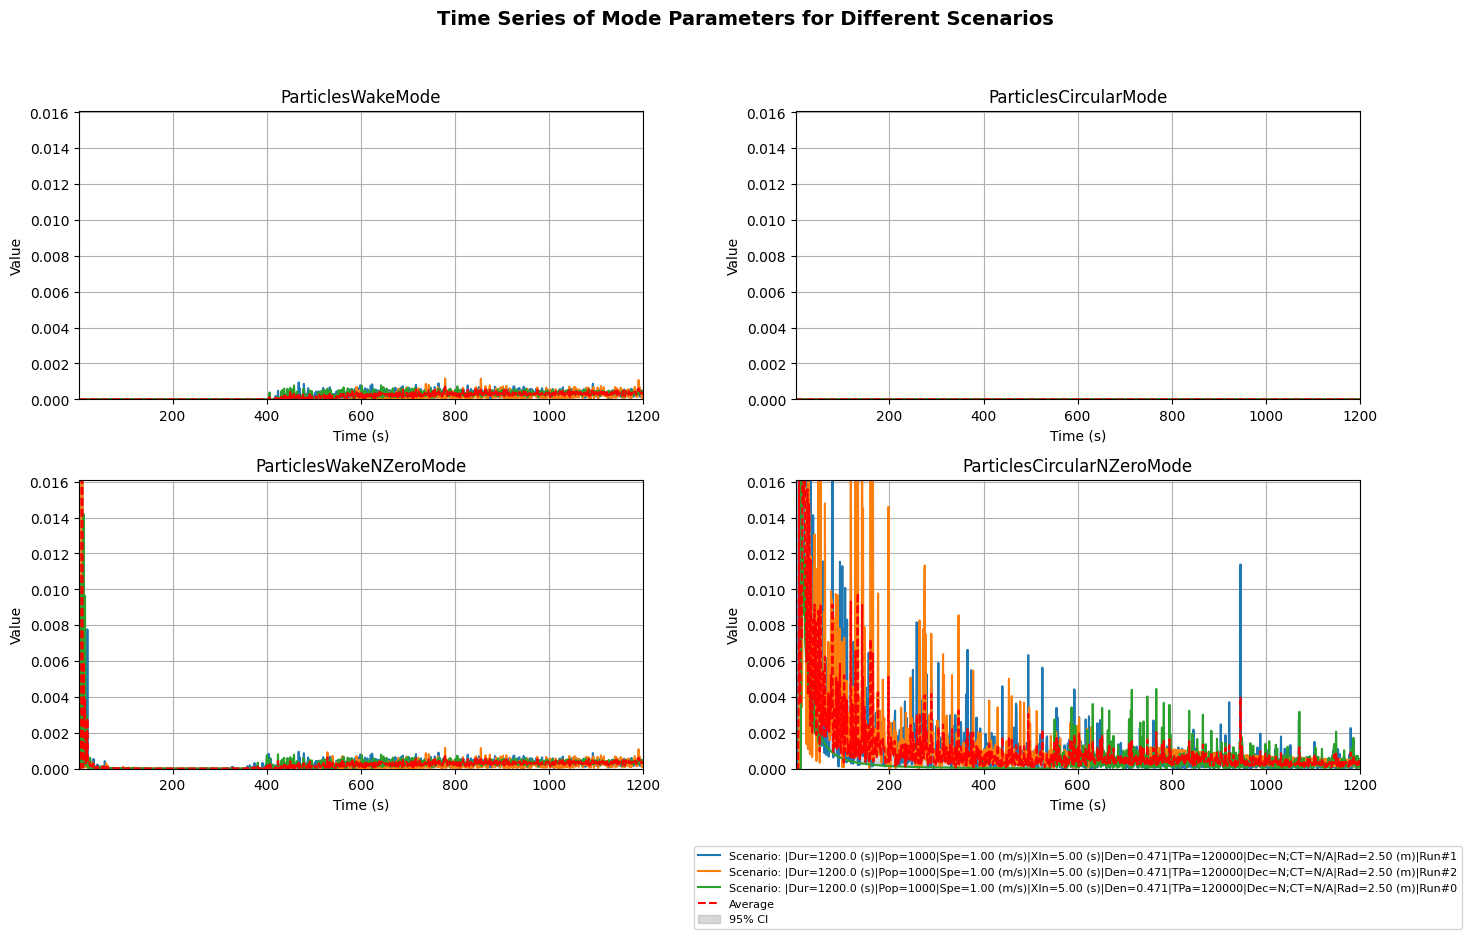

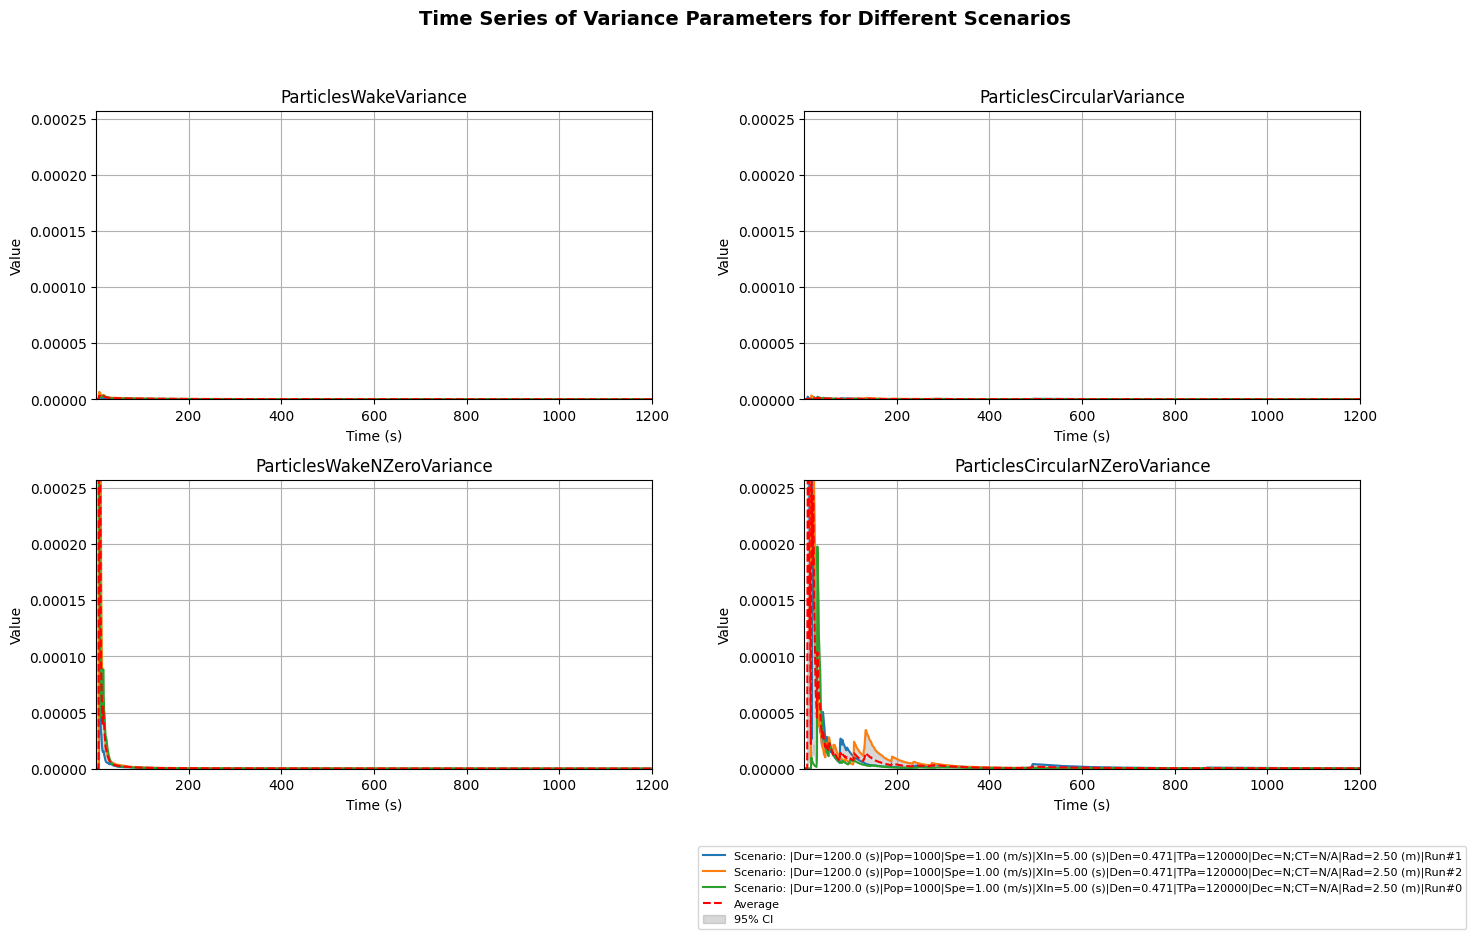

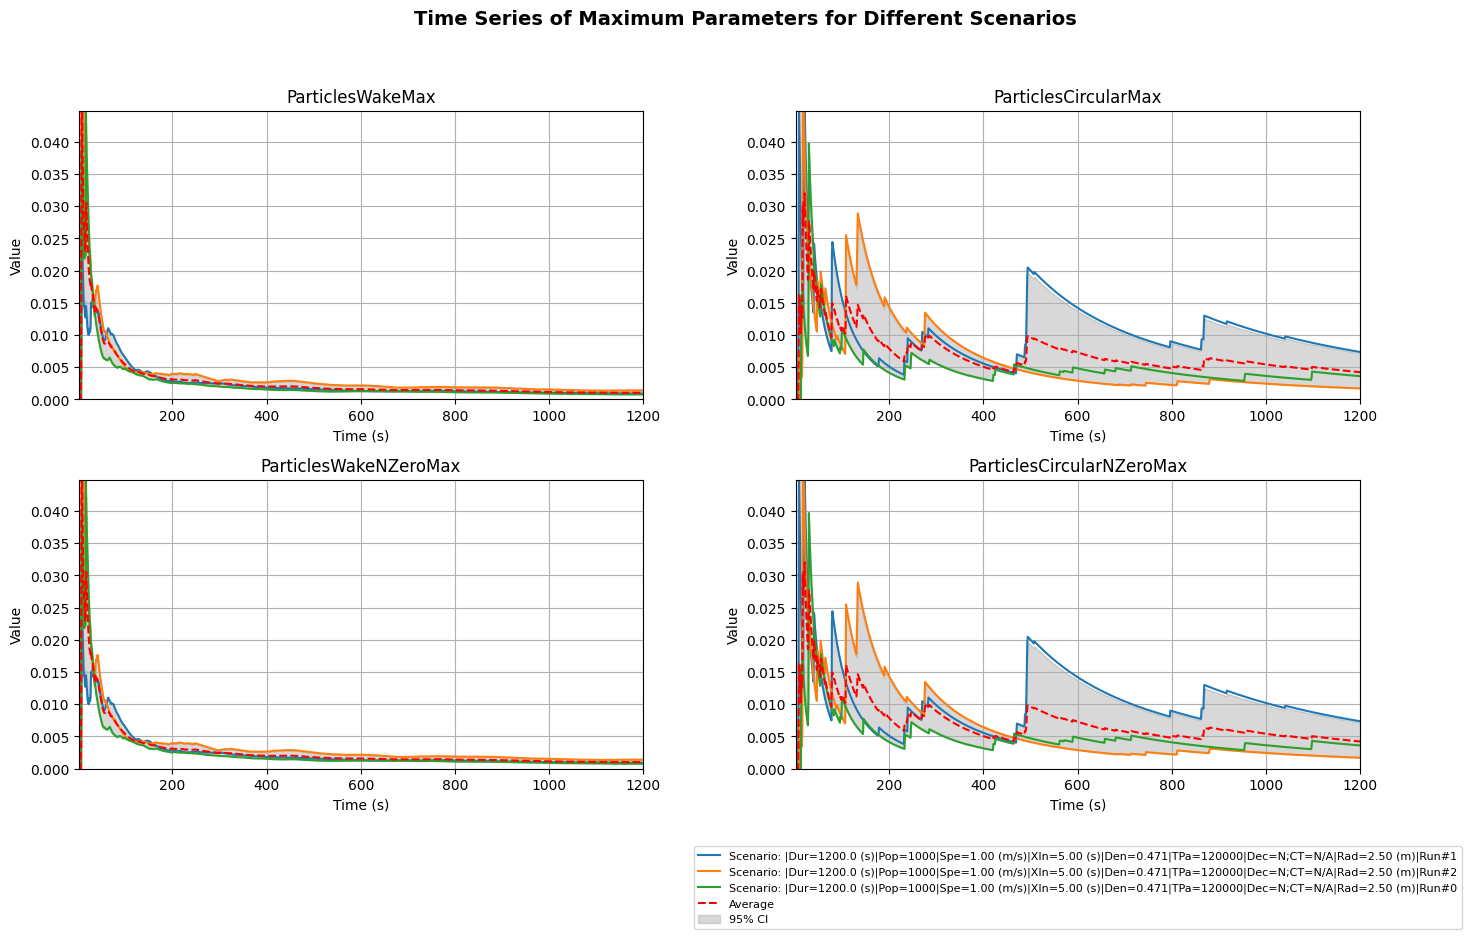

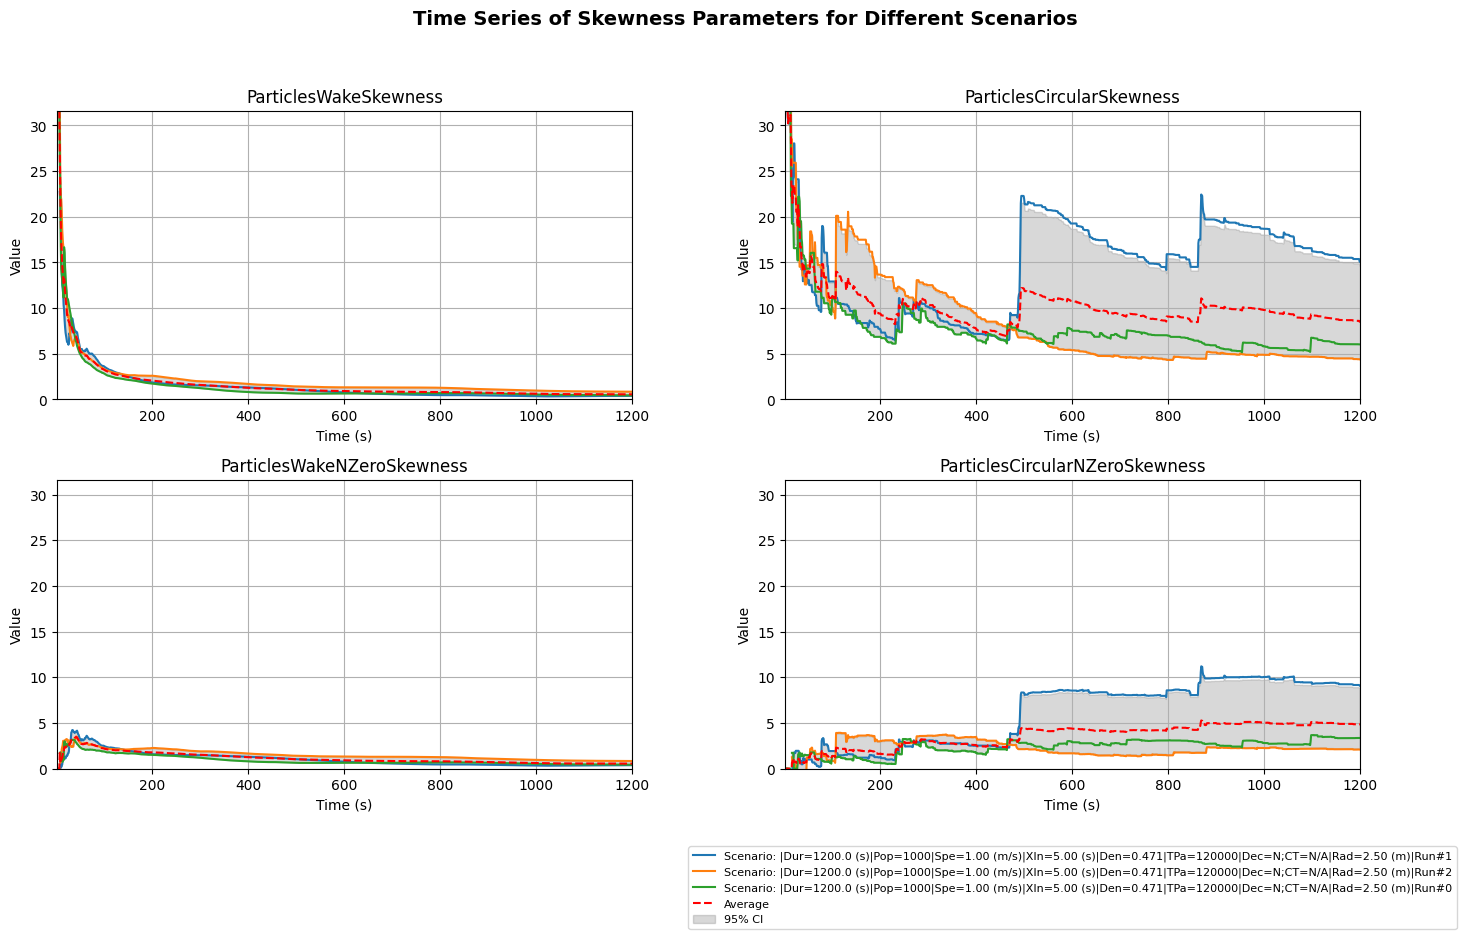

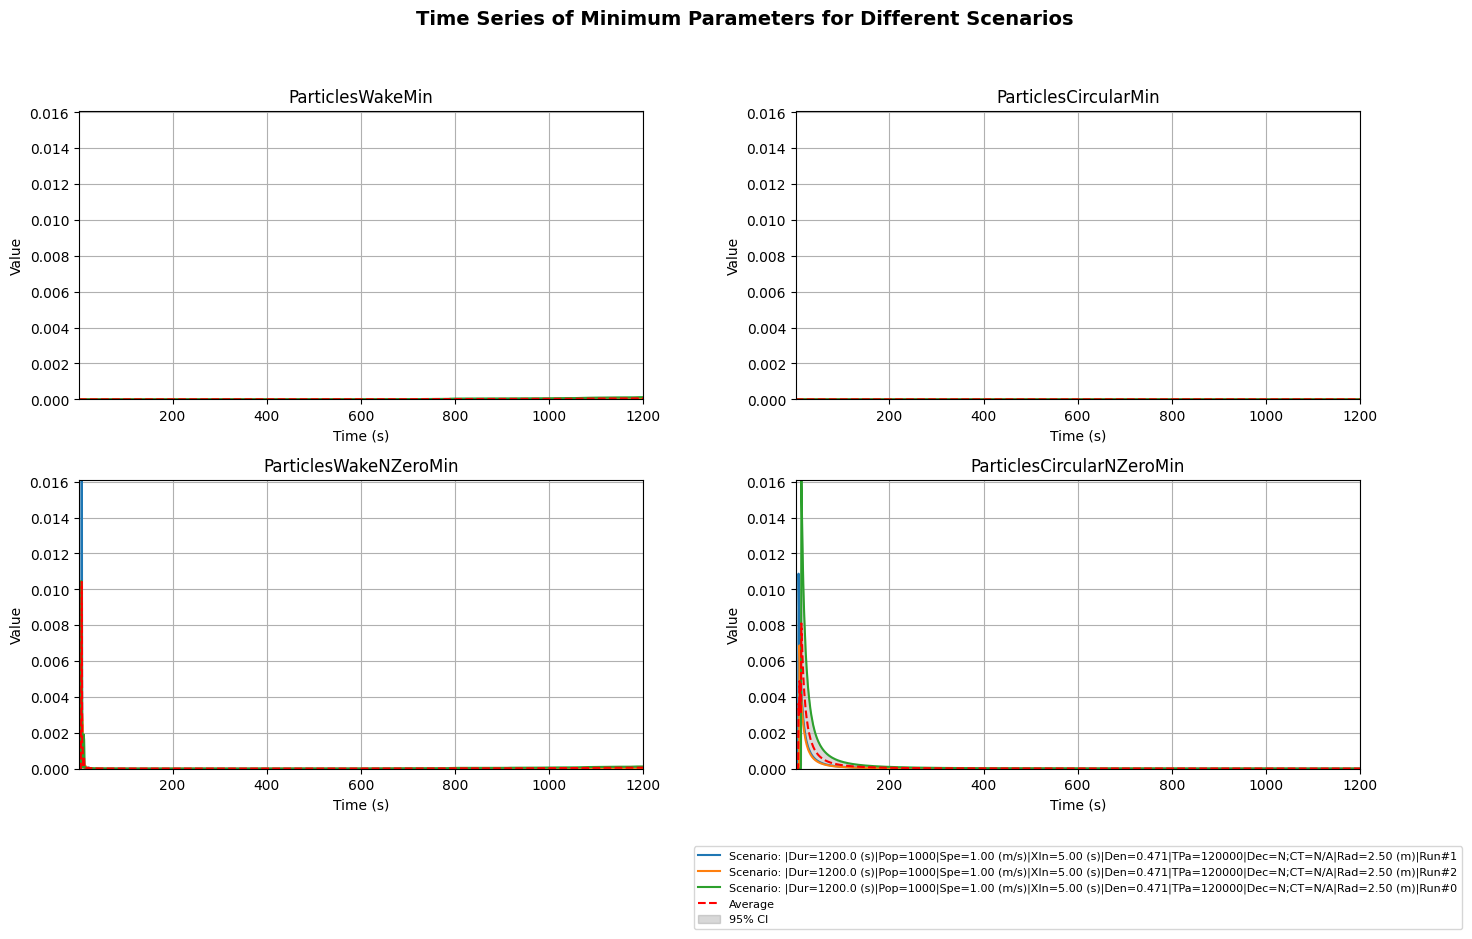

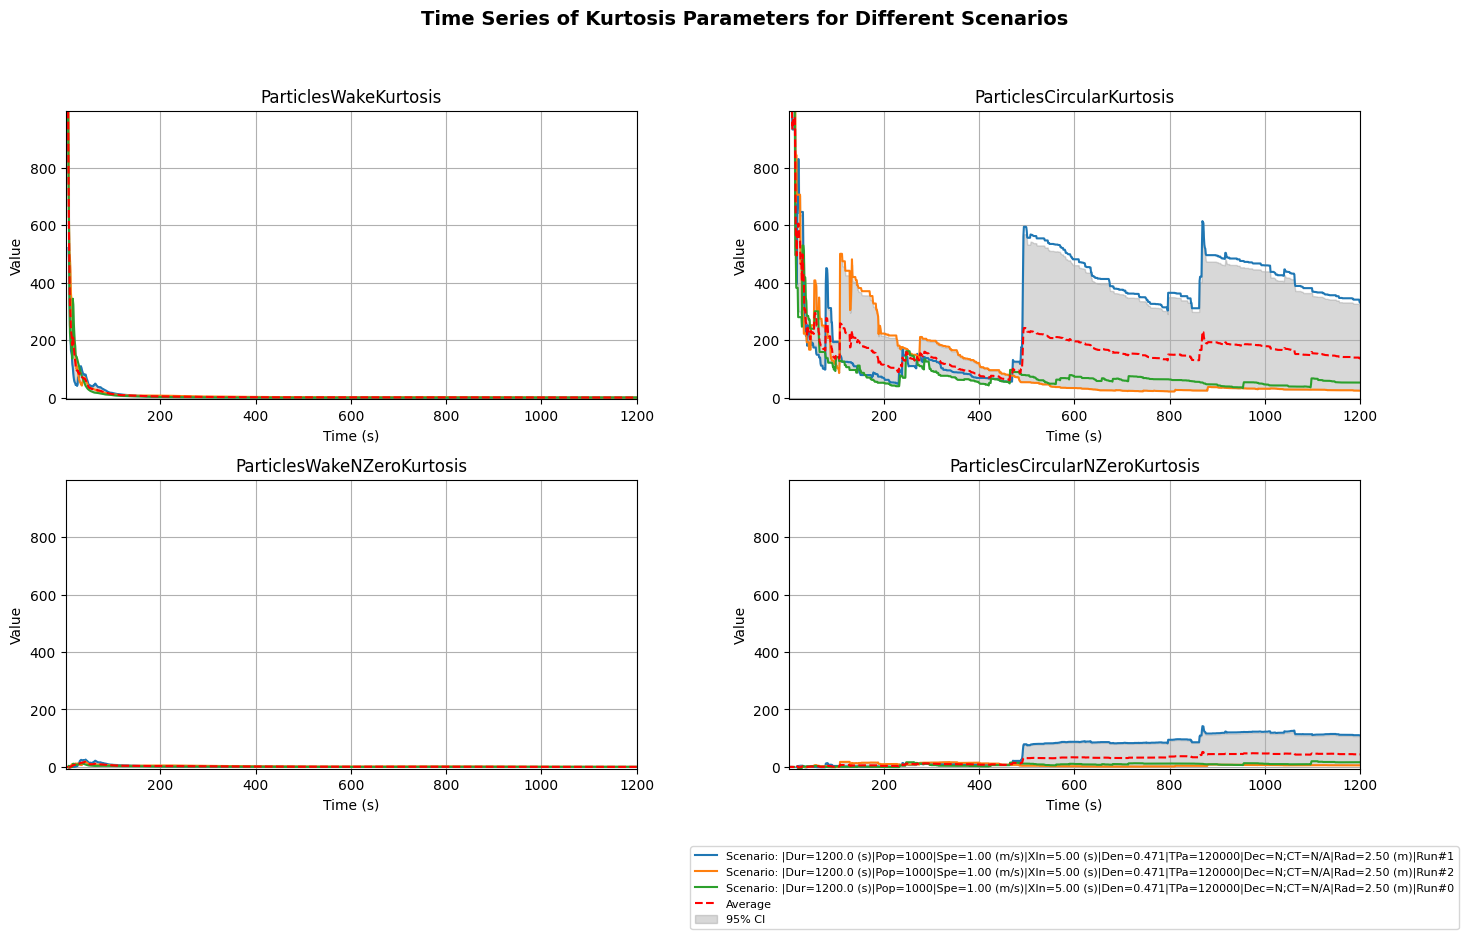

Image paths:
['/content/plots_SummaryResultsTimeseriesAll/Total Particles.jpg', '/content/plots_SummaryResultsTimeseriesAll/Maximum Probable Contatcs.jpg', '/content/plots_SummaryResultsTimeseriesAll/Walkers with at Least One Contact.jpg', '/content/plots_SummaryResultsTimeseriesAll/Median Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Mode Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Variance Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Maximum Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Skewness Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Minimum Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll/Kurtosis Parameters.jpg']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder named "plots" to save the images
plots_folder = '/content/plots_SummaryResultsTimeseriesAll'
os.makedirs(plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries-2400.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_SummaryResultsTimeseries_1200s1m.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_SummaryResultsTimeseries_1200s0.2m.xlsx?raw=true'

df = pd.read_excel(excel_file)

# Print available headers
print("Available Headers:")
print(df.columns.tolist())

# Define categories with corresponding headers
categories = {
    "Total Particles": [
        "TotalParticles"
    ],
    "Maximum Probable Contatcs": [
        "MaximumProbableContacts"
    ],
    "Walkers with at Least One Contact": [
        "Atleast1pWake",
        "Atleast1pCircular"
    ],
    "Median Parameters": [
        "ParticlesWakeMedian",
        "ParticlesCircularMedian",
        "ParticlesWakeNZeroMedian",
        "ParticlesCircularNZeroMedian"
    ],
    "Mode Parameters": [
        "ParticlesWakeMode",
        "ParticlesCircularMode",
        "ParticlesWakeNZeroMode",
        "ParticlesCircularNZeroMode"
    ],
    "Variance Parameters": [
        "ParticlesWakeVariance",
        "ParticlesCircularVariance",
        "ParticlesWakeNZeroVariance",
        "ParticlesCircularNZeroVariance"
    ],
    "Maximum Parameters": [
        "ParticlesWakeMax",
        "ParticlesCircularMax",
        "ParticlesWakeNZeroMax",
        "ParticlesCircularNZeroMax"
    ],
    "Skewness Parameters": [
        "ParticlesWakeSkewness",
        "ParticlesCircularSkewness",
        "ParticlesWakeNZeroSkewness",
        "ParticlesCircularNZeroSkewness"
    ],
    "Minimum Parameters": [
        "ParticlesWakeMin",
        "ParticlesCircularMin",
        "ParticlesWakeNZeroMin",
        "ParticlesCircularNZeroMin"
    ],
    "Kurtosis Parameters": [
        "ParticlesWakeKurtosis",
        "ParticlesCircularKurtosis",
        "ParticlesWakeNZeroKurtosis",
        "ParticlesCircularNZeroKurtosis"
    ]
    # ,
    # "Max PDF Pathogens Parameters": [
    #     "MaxPDFPathogensWake",
    #     "MaxPDFPathogensCircular",
    #     "MaxPDFPathogensWakeNZero",
    #     "MaxPDFPathogensCircularNZero"
    # ]
}

# Plot data for each category
image_paths = []
for category, headers in categories.items():
    plt.figure(figsize=(15, 10))

    # Initialize variables to track y-axis limits
    overall_min_value = np.inf
    overall_max_value = -np.inf

    for i, header in enumerate(headers, 1):
        plt.subplot(2, 2, i)
        if header in df.columns:  # Check if header is present in the DataFrame
            for scenario in df['Title'].unique():
                scenario_data = df[df['Title'] == scenario]
                plt.plot(scenario_data['time(s)'], scenario_data[header], label=f'Scenario: {scenario}')

            # Calculate average and 95% CI for each time step
            avg_values = df.groupby('time(s)')[header].mean()
            ci_lower = df.groupby('time(s)')[header].quantile(0.025)
            ci_upper = df.groupby('time(s)')[header].quantile(0.975)

            # Plot average line
            plt.plot(avg_values.index, avg_values.values, color='r', linestyle='--', label='Average')

            # Plot 95% CI boundary
            plt.fill_between(avg_values.index, ci_lower.values, ci_upper.values, color='gray', alpha=0.3, label='95% CI')

            # Update overall y-axis limits for the category
            overall_min_value = min(overall_min_value, scenario_data[header].min())
            overall_max_value = max(overall_max_value, scenario_data[header].max())

        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.title(header)
        plt.grid(True)
        plt.xlim(df['time(s)'].min(), df['time(s)'].max())

    # Set consistent y-axis limits for all subplots within the category
    for j in range(1, len(headers) + 1):
        plt.subplot(2, 2, j)
        plt.ylim(overall_min_value, overall_max_value)  # Apply consistent y-axis limits

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=8)
    plt.suptitle(f'Time Series of {category} for Different Scenarios', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot as a high-quality image in the "plots" folder
    plot_path = os.path.join(plots_folder, f'{category}.jpg')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    # plt.close()  # Uncomment if you want to close the plot to save memory
    image_paths.append(plot_path)

# Print the paths of saved images
print("Image paths:")
print(image_paths)

#### 1.1.2. Non-Zero

Available Headers:
['time(s)', 'Duration(s)', 'ElapsedTime(s)', 'TotalPopulation', 'TotalInfected', 'Area(m²)', 'Density(p/m²)', 'TotalParticles', 'MaximumProbableContacts', 'CalculateDecay', 'CharacteristicTime(s)', 'MotionRadius', 'Atleast1pWake', 'Atleast1pCircular', 'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode', 'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis', 'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode', 'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis', 'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode', 'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis', 'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'ParticlesCircularNZeroMin', 'ParticlesCircularNZeroMedian

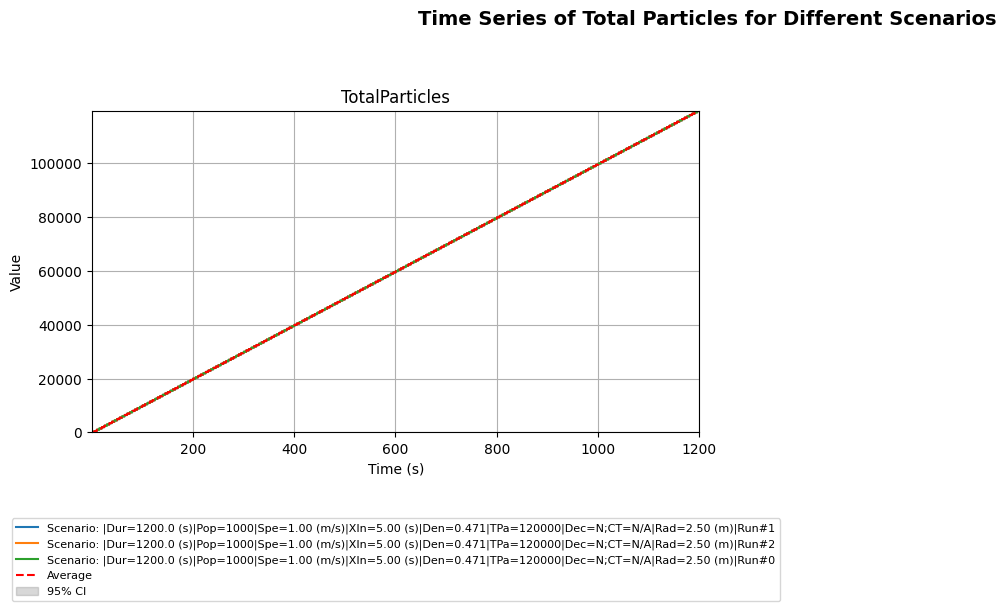

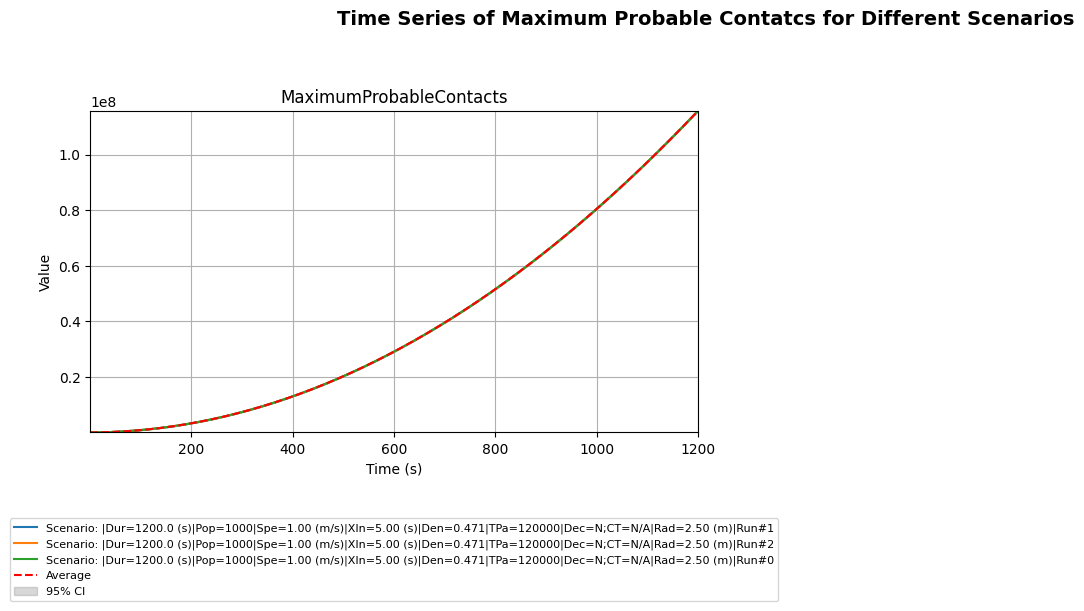

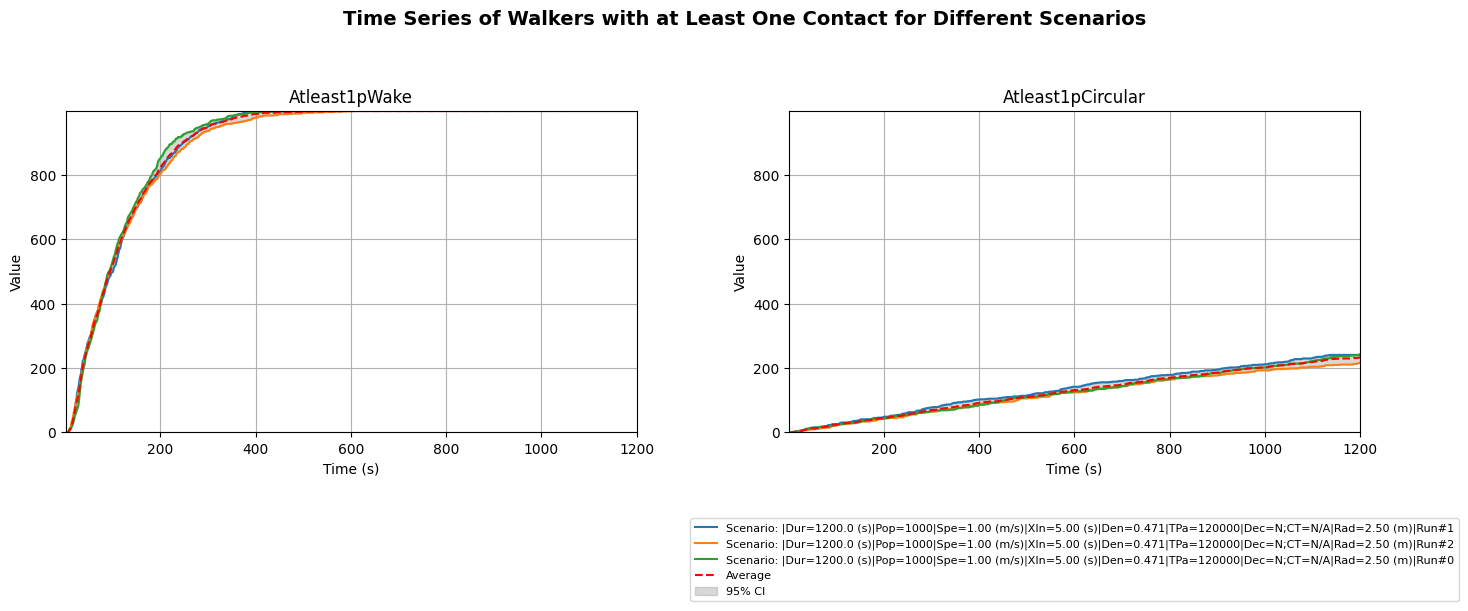

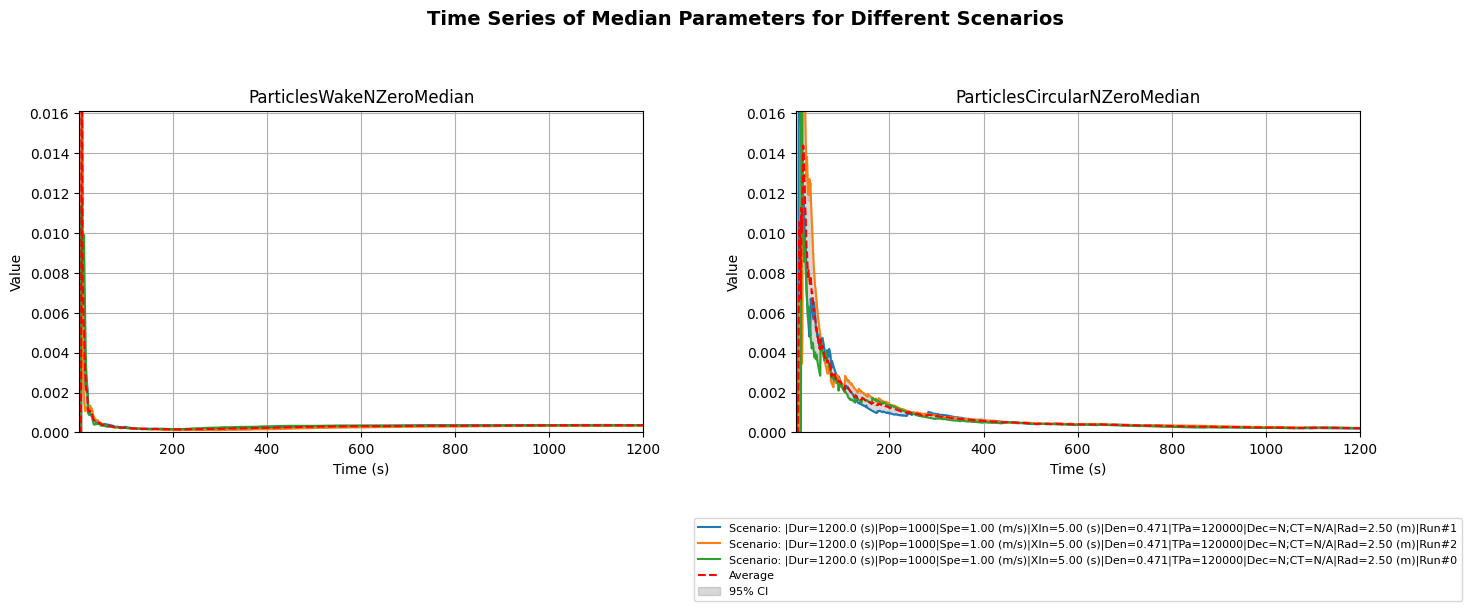

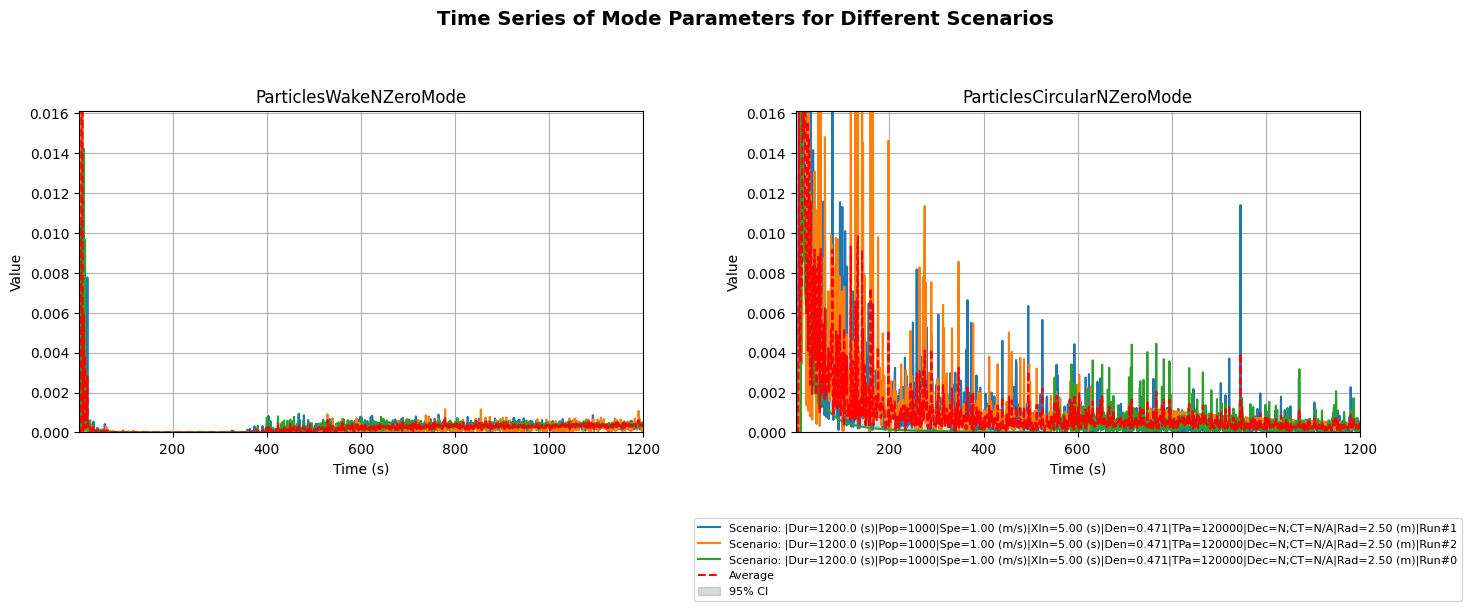

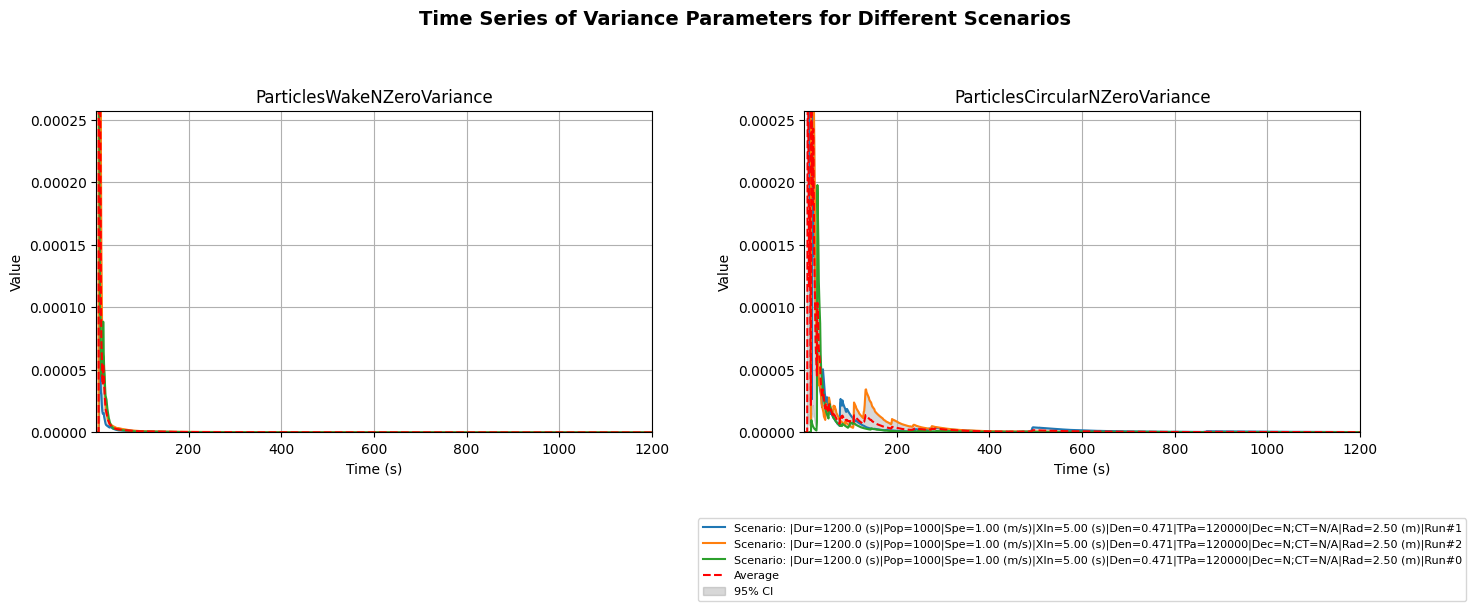

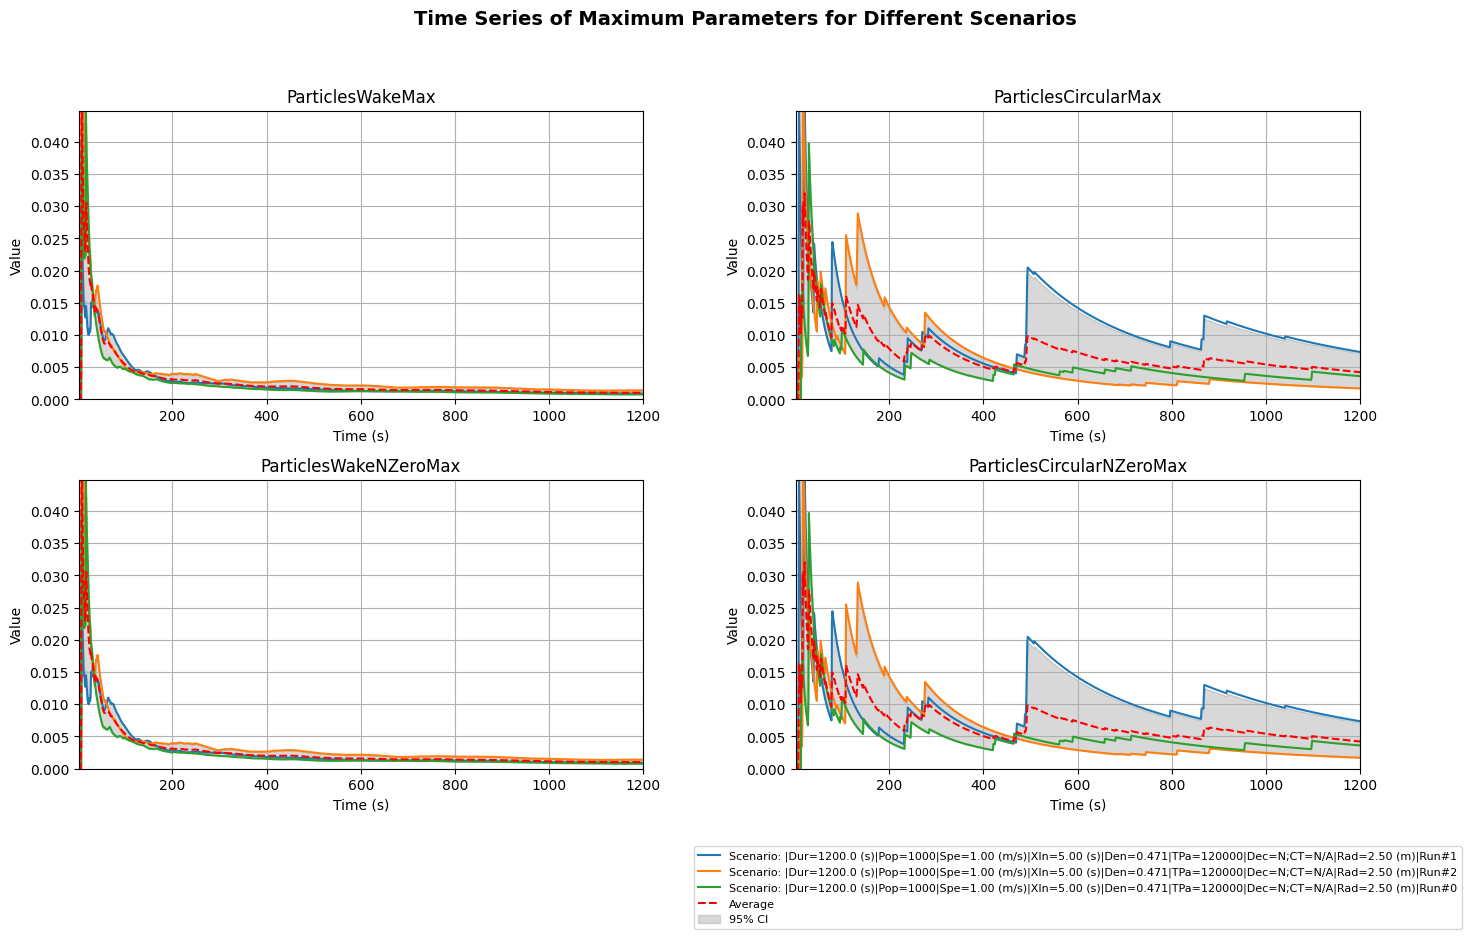

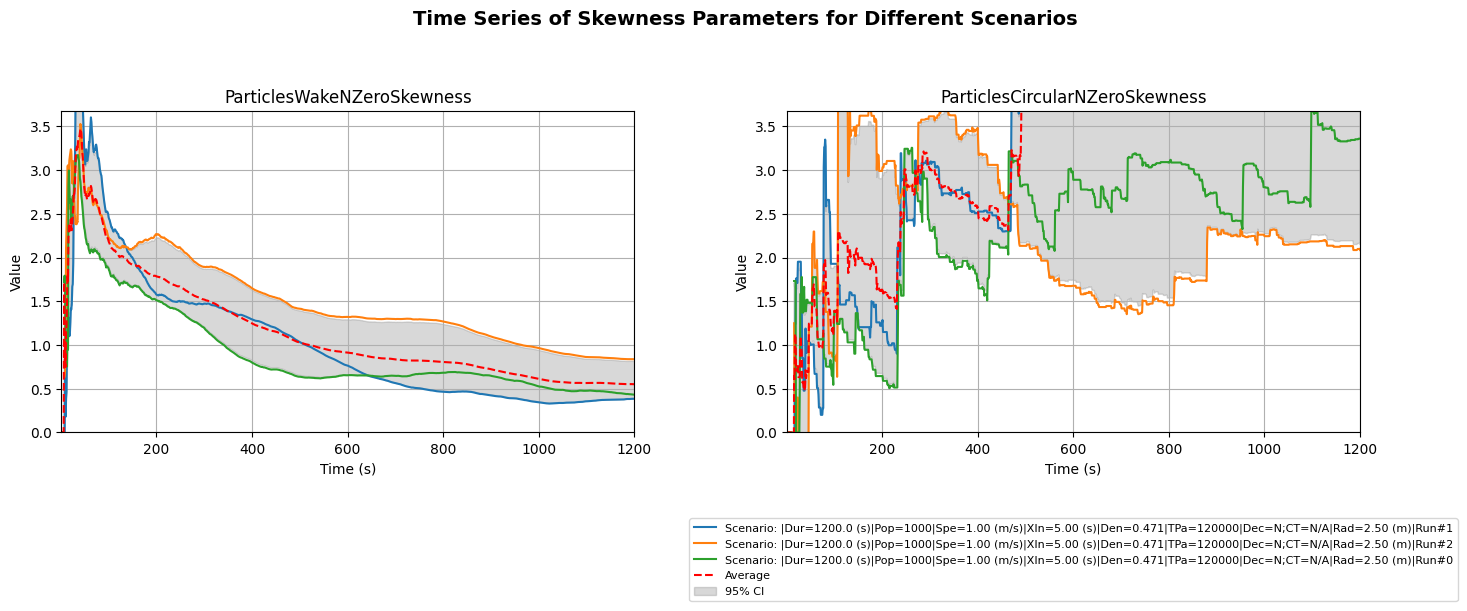

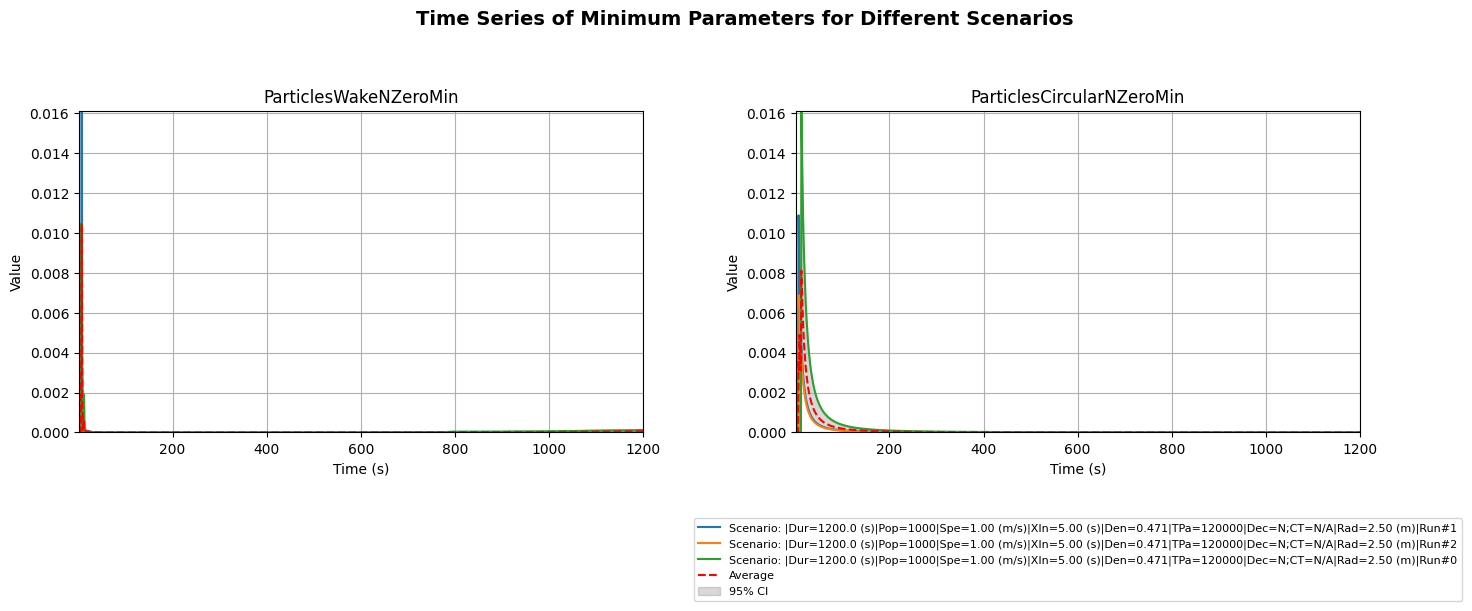

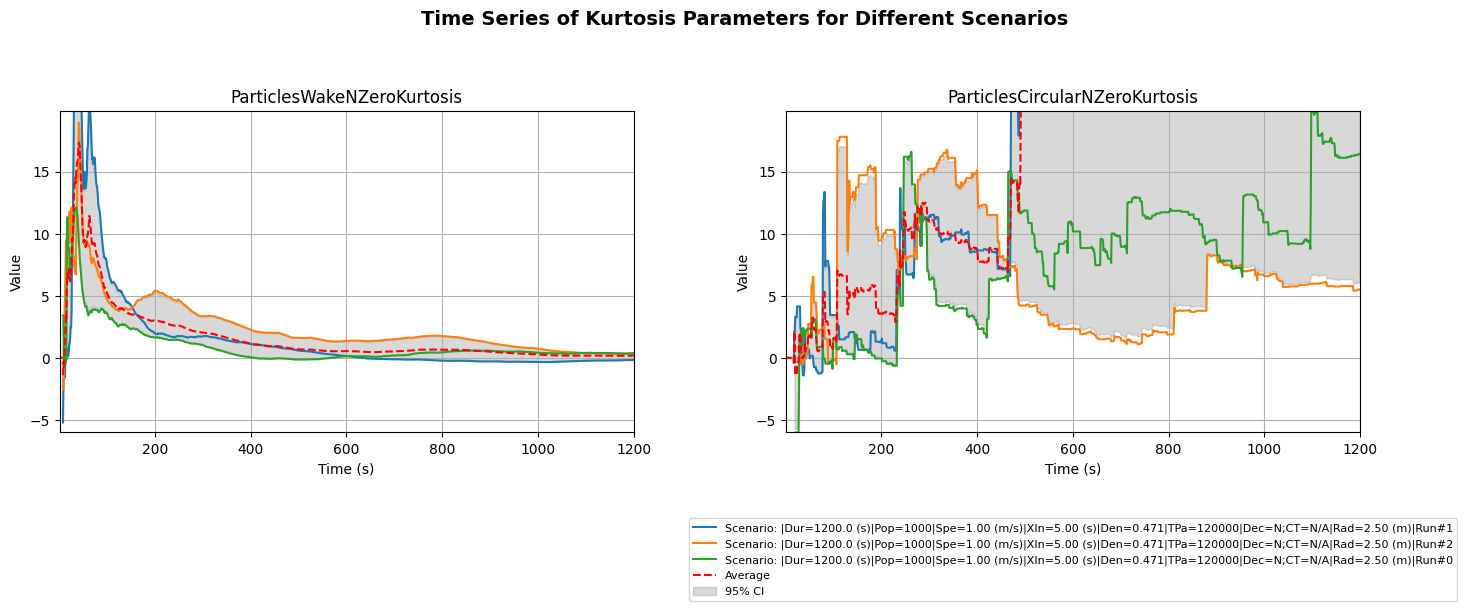

Image paths:
['/content/plots_SummaryResultsTimeseriesAll_NonZero/Total Particles.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Maximum Probable Contatcs.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Walkers with at Least One Contact.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Median Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Mode Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Variance Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Maximum Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Skewness Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Minimum Parameters.jpg', '/content/plots_SummaryResultsTimeseriesAll_NonZero/Kurtosis Parameters.jpg']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder named "plots" to save the images
plots_folder = '/content/plots_SummaryResultsTimeseriesAll_NonZero'
os.makedirs(plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries-2400.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_SummaryResultsTimeseries_1200s1m.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_SummaryResultsTimeseries_1200s0.2m.xlsx?raw=true'

df = pd.read_excel(excel_file)

# Print available headers
print("Available Headers:")
print(df.columns.tolist())

# Define categories with corresponding headers
categories = {
    "Total Particles": [
        "TotalParticles"
    ],
    "Maximum Probable Contatcs": [
        "MaximumProbableContacts"
    ],
    "Walkers with at Least One Contact": [
        "Atleast1pWake",
        "Atleast1pCircular"
    ],
    "Median Parameters": [
        "ParticlesWakeNZeroMedian",
        "ParticlesCircularNZeroMedian"
    ],
    "Mode Parameters": [
        "ParticlesWakeNZeroMode",
        "ParticlesCircularNZeroMode"
    ],
    "Variance Parameters": [
        "ParticlesWakeNZeroVariance",
        "ParticlesCircularNZeroVariance"
    ],
    "Maximum Parameters": [
        "ParticlesWakeMax",
        "ParticlesCircularMax",
        "ParticlesWakeNZeroMax",
        "ParticlesCircularNZeroMax"
    ],
    "Skewness Parameters": [
        "ParticlesWakeNZeroSkewness",
        "ParticlesCircularNZeroSkewness"
    ],
    "Minimum Parameters": [
        "ParticlesWakeNZeroMin",
        "ParticlesCircularNZeroMin"
    ],
    "Kurtosis Parameters": [
        "ParticlesWakeNZeroKurtosis",
        "ParticlesCircularNZeroKurtosis"
    ]
    # ,
    # "Max PDF Pathogens Parameters": [
    #     "MaxPDFPathogensWake",
    #     "MaxPDFPathogensCircular",
    #     "MaxPDFPathogensWakeNZero",
    #     "MaxPDFPathogensCircularNZero"
    # ]
}

# Plot data for each category
image_paths = []
for category, headers in categories.items():
    plt.figure(figsize=(15, 10))

    # Initialize variables to track y-axis limits
    overall_min_value = np.inf
    overall_max_value = -np.inf

    for i, header in enumerate(headers, 1):
        plt.subplot(2, 2, i)
        if header in df.columns:  # Check if header is present in the DataFrame
            for scenario in df['Title'].unique():
                scenario_data = df[df['Title'] == scenario]
                plt.plot(scenario_data['time(s)'], scenario_data[header], label=f'Scenario: {scenario}')

            # Calculate average and 95% CI for each time step
            avg_values = df.groupby('time(s)')[header].mean()
            ci_lower = df.groupby('time(s)')[header].quantile(0.025)
            ci_upper = df.groupby('time(s)')[header].quantile(0.975)

            # Plot average line
            plt.plot(avg_values.index, avg_values.values, color='r', linestyle='--', label='Average')

            # Plot 95% CI boundary
            plt.fill_between(avg_values.index, ci_lower.values, ci_upper.values, color='gray', alpha=0.3, label='95% CI')

            # Update overall y-axis limits for the category
            overall_min_value = min(overall_min_value, scenario_data[header].min())
            overall_max_value = max(overall_max_value, scenario_data[header].max())

        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.title(header)
        plt.grid(True)
        plt.xlim(df['time(s)'].min(), df['time(s)'].max())

    # Set consistent y-axis limits for all subplots within the category
    for j in range(1, len(headers) + 1):
        plt.subplot(2, 2, j)
        plt.ylim(overall_min_value, overall_max_value)  # Apply consistent y-axis limits

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, fontsize=8)
    plt.suptitle(f'Time Series of {category} for Different Scenarios', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot as a high-quality image in the "plots" folder
    plot_path = os.path.join(plots_folder, f'{category}.jpg')
    plt.savefig(plot_path, dpi=300)
    plt.show()
    # plt.close()  # Uncomment if you want to close the plot to save memory
    image_paths.append(plot_path)

# Print the paths of saved images
print("Image paths:")
print(image_paths)

## 2. **Compare Statistics of Raw Data**

### 2.1. **Draw and Save Charts of Raw Data**

#### 2.1.1. **Distributions**

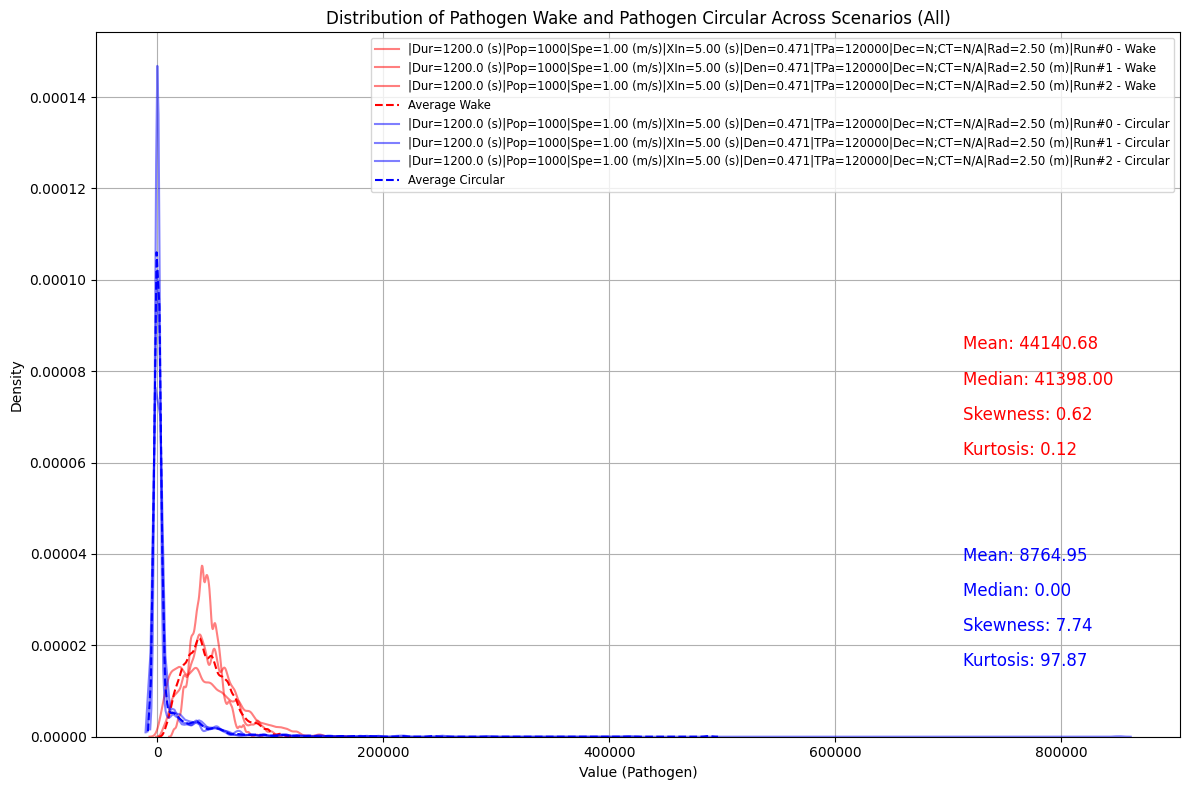

plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_plots_all.jpg

Statistical Indices for Average Wake Distribution (All):
Mean: 44140.68
Median: 41398.00
Skewness: 0.62
Kurtosis: 0.12

Statistical Indices for Average Circular Distribution (All):
Mean: 8764.95
Median: 0.00
Skewness: 7.74
Kurtosis: 97.87


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew, kurtosis

# Create a folder named "combined_kde_plots" to save the images
distributions_plots_folder = '/content/distribution_plots_RawContactLoggerEndSimulation_NonZero'
os.makedirs(distributions_plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData-2400.xlsx?raw=true'  # 2400 sec
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_RawContactLoggerEndSimulation_1200s1m.xlsx?raw=true'  # 1200 sec, 1m
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_RawContactLoggerEndSimulation_1200s0.2m.xlsx?raw=true'  # 1200 sec, 0.2m

df = pd.read_excel(excel_file)

# Group the data by 'Scenario'
grouped_data = df.groupby('Scenario')

# Initialize lists to collect data for plotting
wake_data = []
circular_data = []

# Iterate over each scenario
for scenario, data in grouped_data:
    # Filter non-zero wake and circular values
    wake_values = data['PathogenHumanWake']
    circular_values = data['PathogenHumanCircular']

    # Sort and reset indices for non-zero wake and circular values
    sorted_wake_values = wake_values.sort_values().reset_index(drop=True)
    sorted_circular_values = circular_values.sort_values().reset_index(drop=True)

    # Append sorted and reset values to lists
    wake_data.append(sorted_wake_values)
    circular_data.append(sorted_circular_values)

# Concatenate all sorted wake and circular values along rows (axis=0)
combined_wake_values = pd.concat(wake_data)
combined_circular_values = pd.concat(circular_data)

# Calculate the average of the combined wake and circular values based on index
average_wake = combined_wake_values.groupby(level=0).mean()
average_circular = combined_circular_values.groupby(level=0).mean()

# Plot combined KDE for sorted and averaged wake and circular values
plt.figure(figsize=(12, 8))

# Convert group keys to a list for indexing
group_keys = list(grouped_data.groups.keys())

# Plot KDE for sorted and averaged wake values
for i, wake_dist in enumerate(wake_data):
    sns.kdeplot(wake_dist, color='red', alpha=0.5, label=f'{group_keys[i]} - Wake', bw_method=0.1)

sns.kdeplot(average_wake, color='red', linestyle='--', label='Average Wake', bw_method=0.1)

# Plot KDE for sorted and averaged circular values
for i, circular_dist in enumerate(circular_data):
    sns.kdeplot(circular_dist, color='blue', alpha=0.5, label=f'{group_keys[i]} - Circular', bw_method=0.1)

sns.kdeplot(average_circular, color='blue', linestyle='--', label='Average Circular', bw_method=0.1)

# Annotate statistical indices for average wake distribution
wake_mean = average_wake.mean()
wake_median = average_wake.median()
wake_skewness = skew(average_wake)
wake_kurtosis = kurtosis(average_wake)

plt.text(0.80, 0.55, f'Mean: {wake_mean:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.50, f'Median: {wake_median:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.45, f'Skewness: {wake_skewness:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.40, f'Kurtosis: {wake_kurtosis:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)

# Annotate statistical indices for average circular distribution
circular_mean = average_circular.mean()
circular_median = average_circular.median()
circular_skewness = skew(average_circular)
circular_kurtosis = kurtosis(average_circular)

plt.text(0.80, 0.25, f'Mean: {circular_mean:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.20, f'Median: {circular_median:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.15, f'Skewness: {circular_skewness:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.10, f'Kurtosis: {circular_kurtosis:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Value (Pathogen)')
plt.ylabel('Density')
plt.title('Distribution of Pathogen Wake and Pathogen Circular Across Scenarios (All)')
plt.legend(loc='upper right', fontsize='small', markerscale=2)
plt.grid(True)
plt.tight_layout()

# Save the combined KDE plot as a high-quality image in the "distributions_plots_folder" folder
distributions_plot_path = os.path.join(distributions_plots_folder, 'distributions_plots_all.jpg')
plt.savefig(distributions_plot_path, dpi=300)
plt.show()

# Print the path of the saved combined KDE plot image
print("plot path:")
print(distributions_plot_path)
print()

# Print statistical indices for average wake distribution
print("Statistical Indices for Average Wake Distribution (All):")
print(f"Mean: {wake_mean:.2f}")
print(f"Median: {wake_median:.2f}")
print(f"Skewness: {wake_skewness:.2f}")
print(f"Kurtosis: {wake_kurtosis:.2f}")
print()

# Print statistical indices for average circular distribution
print("Statistical Indices for Average Circular Distribution (All):")
print(f"Mean: {circular_mean:.2f}")
print(f"Median: {circular_median:.2f}")
print(f"Skewness: {circular_skewness:.2f}")
print(f"Kurtosis: {circular_kurtosis:.2f}")

#### 2.1.2. **The Best Fit Distribution**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1992: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py

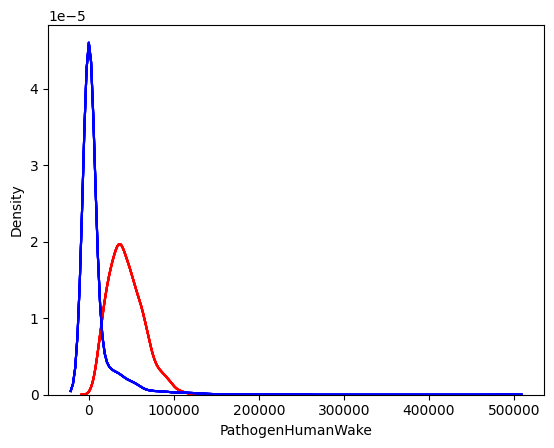

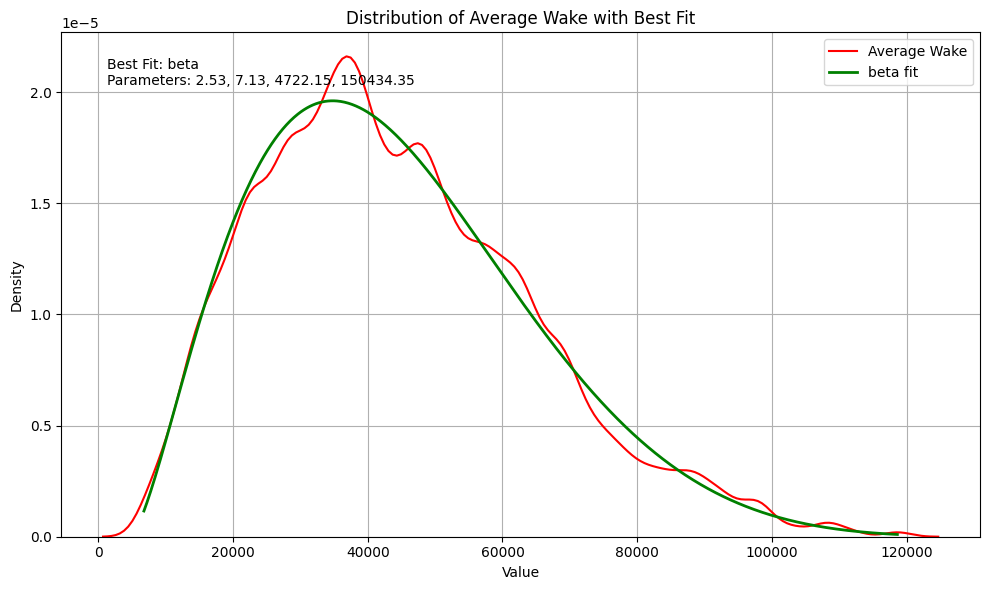

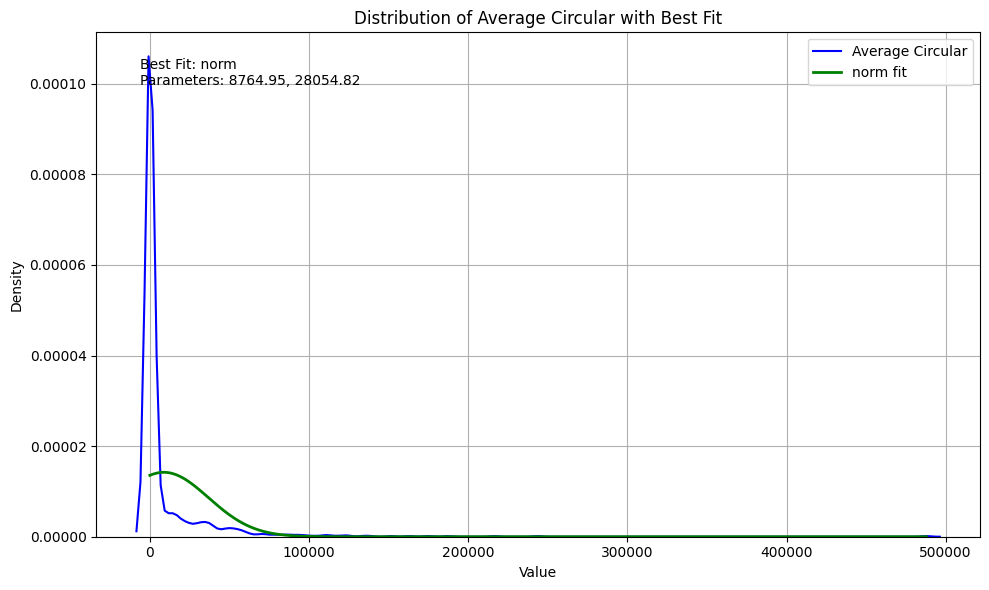

Average Wake KDE plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_kde_wake_all.jpg
Average Circular KDE plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_kde_circular_all.jpg
Best fit distribution for Average Wake: beta
Best fit distribution parameters for Average Wake: (2.530613397361722, 7.127836523054544, 4722.154694187698, 150434.35118331763)
Test results for Average Wake:
              KS_stat chi2_stat  \
norm         0.057391       NaN   
expon        0.208248       NaN   
gamma         0.01911       NaN   
lognorm      0.021984       NaN   
beta         0.011991       NaN   
chi2         0.998999       NaN   
weibull_max  0.860795       NaN   

                                                        params  
norm                   (44140.67801134468, 20219.878809457856)  
expon                  (6768.666666666667, 37372.011344678016)  
gamma        (5.178995605626245, -2792.968457808669, 9062.3..

In [40]:
from scipy import stats

# Define candidate distributions (add more distributions as needed)
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'chi2', 'weibull_max']#

# Initialize dictionaries to store results
results_wake = {}
results_circular = {}

# Fit distributions and calculate test statistics for average wake distribution
for dist_name in distributions:
    dist_params_wake = getattr(stats, dist_name).fit(average_wake)
    ks_stat_wake = stats.kstest(average_wake, dist_name, args=dist_params_wake)[0]
    chi2_stat_wake = np.nan
    try:
        observed_freq_wake = sns.kdeplot(average_wake, color='red').get_lines()[0].get_data()[1]
        expected_freq_wake = getattr(stats, dist_name).pdf(np.linspace(average_wake.min(), average_wake.max(), len(observed_freq_wake)), *dist_params_wake)
        chi2_stat_wake = stats.chisquare(observed_freq_wake, f_exp=expected_freq_wake)[0]
    except ValueError:
        pass
    results_wake[dist_name] = {'KS_stat': ks_stat_wake, 'chi2_stat': chi2_stat_wake, 'params': dist_params_wake}

# Fit distributions and calculate test statistics for average circular distribution
for dist_name in distributions:
    dist_params_circular = getattr(stats, dist_name).fit(average_circular)
    ks_stat_circular = stats.kstest(average_circular, dist_name, args=dist_params_circular)[0]
    chi2_stat_circular = np.nan
    try:
        observed_freq_circular = sns.kdeplot(average_circular, color='blue').get_lines()[0].get_data()[1]
        expected_freq_circular = getattr(stats, dist_name).pdf(np.linspace(average_circular.min(), average_circular.max(), len(observed_freq_circular)), *dist_params_circular)
        chi2_stat_circular = stats.chisquare(observed_freq_circular, f_exp=expected_freq_circular)[0]
    except ValueError:
        pass
    results_circular[dist_name] = {'KS_stat': ks_stat_circular, 'chi2_stat': chi2_stat_circular, 'params': dist_params_circular}

# Find the best-fit distribution for each dataset based on KS statistic
best_fit_wake = min(results_wake, key=lambda x: results_wake[x]['KS_stat'])
best_fit_circular = min(results_circular, key=lambda x: results_circular[x]['KS_stat'])

# Plot KDE and best-fit distribution for average wake distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(average_wake, color='red', label='Average Wake', bw_method=0.1)

# Plot the best-fit distribution
x = np.linspace(average_wake.min(), average_wake.max(), 1000)
y = getattr(stats, best_fit_wake).pdf(x, *results_wake[best_fit_wake]['params'])
plt.plot(x, y, 'green', lw=2, label=best_fit_wake + ' fit')

# Annotate the best-fit distribution parameters
dist_params_str = ', '.join([f'{param:.2f}' for param in results_wake[best_fit_wake]['params']])
plt.text(0.05, 0.95, f'Best Fit: {best_fit_wake}\nParameters: {dist_params_str}', transform=plt.gca().transAxes, verticalalignment='top')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Average Wake with Best Fit (All)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the image
wake_kde_path = os.path.join(distributions_plots_folder, 'distributions_kde_wake_all.jpg')
plt.savefig(wake_kde_path, dpi=300)
plt.show()

# Plot KDE and best-fit distribution for average circular distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(average_circular, color='blue', label='Average Circular', bw_method=0.1)

# Plot the best-fit distribution
x = np.linspace(average_circular.min(), average_circular.max(), 1000)
y = getattr(stats, best_fit_circular).pdf(x, *results_circular[best_fit_circular]['params'])
plt.plot(x, y, 'green', lw=2, label=best_fit_circular + ' fit')

# Annotate the best-fit distribution parameters
dist_params_str = ', '.join([f'{param:.2f}' for param in results_circular[best_fit_circular]['params']])
plt.text(0.05, 0.95, f'Best Fit: {best_fit_circular}\nParameters: {dist_params_str}', transform=plt.gca().transAxes, verticalalignment='top')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Average Circular with Best Fit (All)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the image
circular_kde_path = os.path.join(distributions_plots_folder, 'distributions_kde_circular_all.jpg')
plt.savefig(circular_kde_path, dpi=300)
plt.show()

# Print the paths of saved KDE plot images
print("Average Wake KDE plot path:")
print(wake_kde_path)
print("Average Circular KDE plot path:")
print(circular_kde_path)

# Print the test results for average wake distribution
print("Best fit distribution for Average Wake:", best_fit_wake)
print("Best fit distribution parameters for Average Wake:", results_wake[best_fit_wake]['params'])
print("Test results for Average Wake:")
print(pd.DataFrame.from_dict(results_wake).transpose())

# Print the test results for average circular distribution
print("Best fit distribution for Average Circular:", best_fit_circular)
print("Best fit distribution parameters for Average Circular:", results_circular[best_fit_circular]['params'])
print("Test results for Average Circular:")
print(pd.DataFrame.from_dict(results_circular).transpose())

### 2.2. Draw and Save Non-Zero Charts of Raw Data

#### 2.2.1. **Distributions Non-Zero**

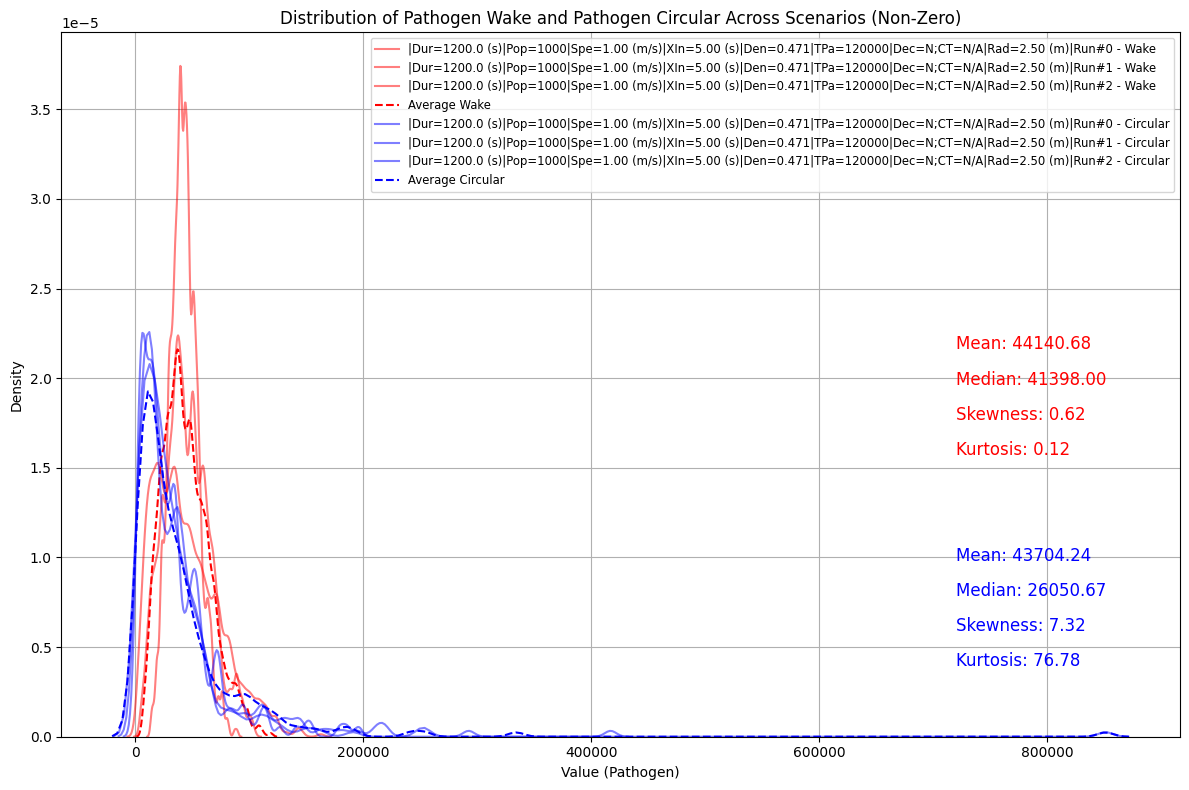

Combined KDE plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_plots_nonzero.jpg

Statistical Indices for Average Wake Distribution:
Mean: 44140.68
Median: 41398.00
Skewness: 0.62
Kurtosis: 0.12

Statistical Indices for Average Circular Distribution:
Mean: 43704.24
Median: 26050.67
Skewness: 7.32
Kurtosis: 76.78


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import skew, kurtosis

# Create a folder named "combined_kde_plots" to save the images
distributions_plots_folder = '/content/distribution_plots_RawContactLoggerEndSimulation_NonZero'
os.makedirs(distributions_plots_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData-2400.xlsx?raw=true'  # 2400 sec
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_RawContactLoggerEndSimulation_1200s1m.xlsx?raw=true'  # 1200 sec, 1m
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/csv_RawContactLoggerEndSimulation_1200s0.2m.xlsx?raw=true'  # 1200 sec, 0.2m

df = pd.read_excel(excel_file)

# Group the data by 'Scenario'
grouped_data = df.groupby('Scenario')

# Initialize lists to collect data for plotting
wake_data = []
circular_data = []

# Iterate over each scenario
for scenario, data in grouped_data:
    # Filter non-zero wake and circular values
    non_zero_wake_values = data[data['PathogenHumanWake'] != 0]['PathogenHumanWake']
    non_zero_circular_values = data[data['PathogenHumanCircular'] != 0]['PathogenHumanCircular']

    # Sort and reset indices for non-zero wake and circular values
    sorted_wake_values = non_zero_wake_values.sort_values().reset_index(drop=True)
    sorted_circular_values = non_zero_circular_values.sort_values().reset_index(drop=True)

    # Append sorted and reset values to lists
    wake_data.append(sorted_wake_values)
    circular_data.append(sorted_circular_values)

# Concatenate all sorted wake and circular values along rows (axis=0)
combined_wake_values = pd.concat(wake_data)
combined_circular_values = pd.concat(circular_data)

# Calculate the average of the combined wake and circular values based on index
average_wake_nonzero = combined_wake_values.groupby(level=0).mean()
average_circular = combined_circular_values.groupby(level=0).mean()

# Plot combined KDE for sorted and averaged wake and circular values
plt.figure(figsize=(12, 8))

# Convert group keys to a list for indexing
group_keys = list(grouped_data.groups.keys())

# Plot KDE for sorted and averaged wake values
for i, wake_dist in enumerate(wake_data):
    sns.kdeplot(wake_dist, color='red', alpha=0.5, label=f'{group_keys[i]} - Wake', bw_method=0.1)

sns.kdeplot(average_wake_nonzero, color='red', linestyle='--', label='Average Wake', bw_method=0.1)

# Plot KDE for sorted and averaged circular values
for i, circular_dist in enumerate(circular_data):
    sns.kdeplot(circular_dist, color='blue', alpha=0.5, label=f'{group_keys[i]} - Circular', bw_method=0.1)

sns.kdeplot(average_circular, color='blue', linestyle='--', label='Average Circular', bw_method=0.1)

# Annotate statistical indices for average wake distribution
wake_mean = average_wake_nonzero.mean()
wake_median = average_wake_nonzero.median()
wake_skewness = skew(average_wake_nonzero)
wake_kurtosis = kurtosis(average_wake_nonzero)

plt.text(0.80, 0.55, f'Mean: {wake_mean:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.50, f'Median: {wake_median:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.45, f'Skewness: {wake_skewness:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.40, f'Kurtosis: {wake_kurtosis:.2f}', color='red', transform=plt.gca().transAxes, fontsize=12)

# Annotate statistical indices for average circular distribution
circular_mean = average_circular.mean()
circular_median = average_circular.median()
circular_skewness = skew(average_circular)
circular_kurtosis = kurtosis(average_circular)

plt.text(0.80, 0.25, f'Mean: {circular_mean:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.20, f'Median: {circular_median:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.15, f'Skewness: {circular_skewness:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.80, 0.10, f'Kurtosis: {circular_kurtosis:.2f}', color='blue', transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Value (Pathogen)')
plt.ylabel('Density')
plt.title('Distribution of Pathogen Wake and Pathogen Circular Across Scenarios (Non-Zero)')
plt.legend(loc='upper right', fontsize='small', markerscale=2)
plt.grid(True)
plt.tight_layout()

# Save the combined KDE plot as a high-quality image in the "distributions_plots_folder" folder
distributions_plot_path = os.path.join(distributions_plots_folder, 'distributions_plots_nonzero.jpg')
plt.savefig(distributions_plot_path, dpi=300)
plt.show()

# Print the path of the saved combined KDE plot image
print("Combined KDE plot path:")
print(distributions_plot_path)
print()

# Print statistical indices for average wake distribution
print("Statistical Indices for Average Wake Distribution:")
print(f"Mean: {wake_mean:.2f}")
print(f"Median: {wake_median:.2f}")
print(f"Skewness: {wake_skewness:.2f}")
print(f"Kurtosis: {wake_kurtosis:.2f}")
print()

# Print statistical indices for average circular distribution
print("Statistical Indices for Average Circular Distribution:")
print(f"Mean: {circular_mean:.2f}")
print(f"Median: {circular_median:.2f}")
print(f"Skewness: {circular_skewness:.2f}")
print(f"Kurtosis: {circular_kurtosis:.2f}")

#### 2.1.2. **The Best Fit Distribution Non-Zero**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


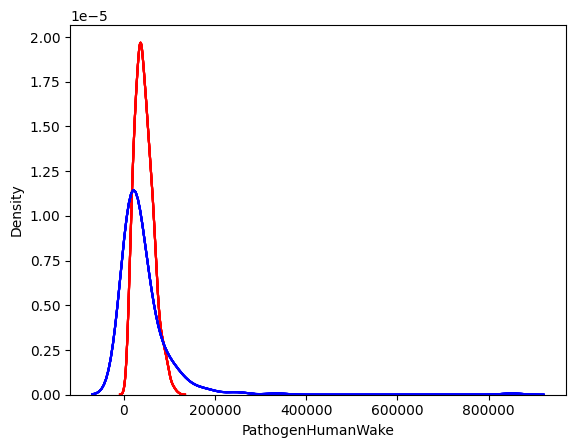

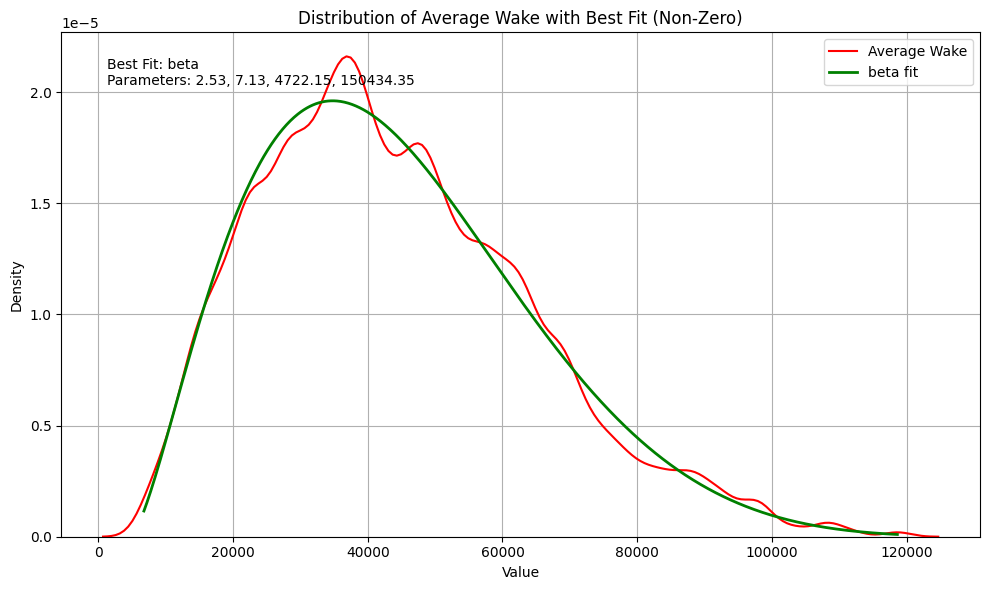

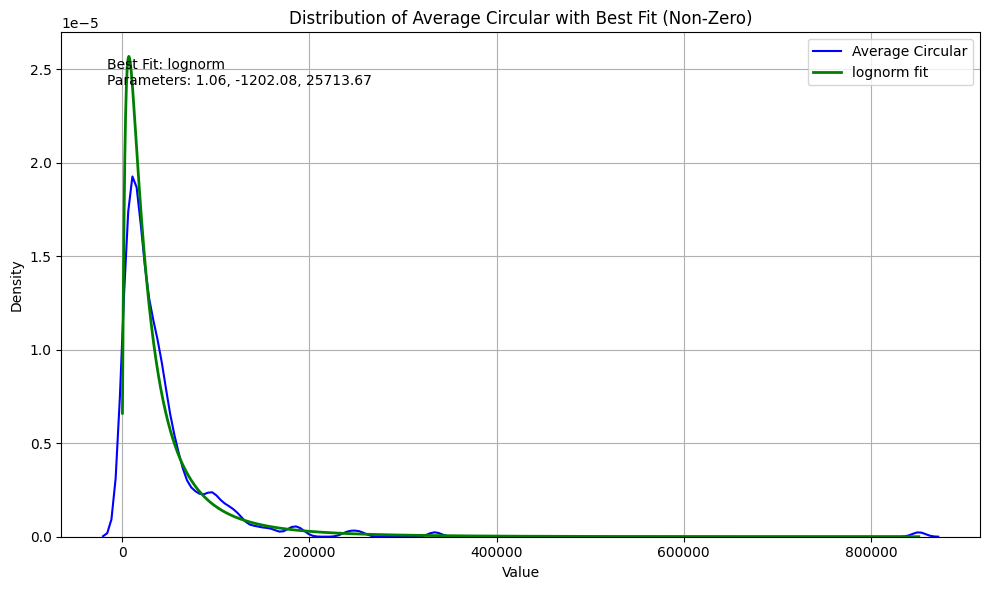

Average Wake KDE plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_kde_wake_nonzero.jpg
Average Circular KDE plot path:
/content/distribution_plots_RawContactLoggerEndSimulation_NonZero/distributions_kde_circular_nonzero.jpg
Best fit distribution for Average Wake: beta
Best fit distribution parameters for Average Wake: (2.530613397361722, 7.127836523054544, 4722.154694187698, 150434.35118331763)
Test results for Average Wake:
              KS_stat chi2_stat  \
norm         0.057391       NaN   
expon        0.208248       NaN   
gamma         0.01911       NaN   
lognorm      0.021984       NaN   
beta         0.011991       NaN   
chi2         0.998999       NaN   
weibull_max  0.860795       NaN   

                                                        params  
norm                   (44140.67801134468, 20219.878809457856)  
expon                  (6768.666666666667, 37372.011344678016)  
gamma        (5.178995605626245, -2792.968457808669, 

In [37]:
from scipy import stats

# Define candidate distributions (add more distributions as needed)
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'chi2', 'weibull_max']#

# Initialize dictionaries to store results
results_wake = {}
results_circular = {}

# Fit distributions and calculate test statistics for average wake distribution
for dist_name in distributions:
    dist_params_wake = getattr(stats, dist_name).fit(average_wake_nonzero)
    ks_stat_wake = stats.kstest(average_wake_nonzero, dist_name, args=dist_params_wake)[0]
    chi2_stat_wake = np.nan
    try:
        observed_freq_wake = sns.kdeplot(average_wake_nonzero, color='red').get_lines()[0].get_data()[1]
        expected_freq_wake = getattr(stats, dist_name).pdf(np.linspace(average_wake_nonzero.min(), average_wake_nonzero.max(), len(observed_freq_wake)), *dist_params_wake)
        chi2_stat_wake = stats.chisquare(observed_freq_wake, f_exp=expected_freq_wake)[0]
    except ValueError:
        pass
    results_wake[dist_name] = {'KS_stat': ks_stat_wake, 'chi2_stat': chi2_stat_wake, 'params': dist_params_wake}

# Fit distributions and calculate test statistics for average circular distribution
for dist_name in distributions:
    dist_params_circular = getattr(stats, dist_name).fit(average_circular)
    ks_stat_circular = stats.kstest(average_circular, dist_name, args=dist_params_circular)[0]
    chi2_stat_circular = np.nan
    try:
        observed_freq_circular = sns.kdeplot(average_circular, color='blue').get_lines()[0].get_data()[1]
        expected_freq_circular = getattr(stats, dist_name).pdf(np.linspace(average_circular.min(), average_circular.max(), len(observed_freq_circular)), *dist_params_circular)
        chi2_stat_circular = stats.chisquare(observed_freq_circular, f_exp=expected_freq_circular)[0]
    except ValueError:
        pass
    results_circular[dist_name] = {'KS_stat': ks_stat_circular, 'chi2_stat': chi2_stat_circular, 'params': dist_params_circular}

# Find the best-fit distribution for each dataset based on KS statistic
best_fit_wake = min(results_wake, key=lambda x: results_wake[x]['KS_stat'])
best_fit_circular = min(results_circular, key=lambda x: results_circular[x]['KS_stat'])

# Plot KDE and best-fit distribution for average wake distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(average_wake_nonzero, color='red', label='Average Wake', bw_method=0.1)

# Plot the best-fit distribution
x = np.linspace(average_wake_nonzero.min(), average_wake_nonzero.max(), 1000)
y = getattr(stats, best_fit_wake).pdf(x, *results_wake[best_fit_wake]['params'])
plt.plot(x, y, 'green', lw=2, label=best_fit_wake + ' fit')

# Annotate the best-fit distribution parameters
dist_params_str = ', '.join([f'{param:.2f}' for param in results_wake[best_fit_wake]['params']])
plt.text(0.05, 0.95, f'Best Fit: {best_fit_wake}\nParameters: {dist_params_str}', transform=plt.gca().transAxes, verticalalignment='top')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Average Wake with Best Fit (Non-Zero)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the image
wake_kde_path = os.path.join(distributions_plots_folder, 'distributions_kde_wake_nonzero.jpg')
plt.savefig(wake_kde_path, dpi=300)
plt.show()

# Plot KDE and best-fit distribution for average circular distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(average_circular, color='blue', label='Average Circular', bw_method=0.1)

# Plot the best-fit distribution
x = np.linspace(average_circular.min(), average_circular.max(), 1000)
y = getattr(stats, best_fit_circular).pdf(x, *results_circular[best_fit_circular]['params'])
plt.plot(x, y, 'green', lw=2, label=best_fit_circular + ' fit')

# Annotate the best-fit distribution parameters
dist_params_str = ', '.join([f'{param:.2f}' for param in results_circular[best_fit_circular]['params']])
plt.text(0.05, 0.95, f'Best Fit: {best_fit_circular}\nParameters: {dist_params_str}', transform=plt.gca().transAxes, verticalalignment='top')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Average Circular with Best Fit (Non-Zero)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the image
circular_kde_path = os.path.join(distributions_plots_folder, 'distributions_kde_circular_nonzero.jpg')
plt.savefig(circular_kde_path, dpi=300)
plt.show()

# Print the paths of saved KDE plot images
print("Average Wake KDE plot path:")
print(wake_kde_path)
print("Average Circular KDE plot path:")
print(circular_kde_path)

# Print the test results for average wake distribution
print("Best fit distribution for Average Wake:", best_fit_wake)
print("Best fit distribution parameters for Average Wake:", results_wake[best_fit_wake]['params'])
print("Test results for Average Wake:")
print(pd.DataFrame.from_dict(results_wake).transpose())

# Print the test results for average circular distribution
print("Best fit distribution for Average Circular:", best_fit_circular)
print("Best fit distribution parameters for Average Circular:", results_circular[best_fit_circular]['params'])
print("Test results for Average Circular:")
print(pd.DataFrame.from_dict(results_circular).transpose())

## 3. **Upload Images**

### 3.1. **Upload Plots on Google Drive to be able to Add to Google Slides**

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
import datetime

# Authenticate and create the service
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Create a folder with a unique name based on the current date and time
folder_name = f"plots_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"
folder_metadata = {
    'name': folder_name,
    'mimeType': 'application/vnd.google-apps.folder'
}
folder = drive_service.files().create(body=folder_metadata, fields='id').execute()
folder_id = folder.get('id')

# Folder path containing the images
image_folder_path = '/content/plots_SummaryResultsTimeseriesAll'
# image_folder_path = '/content/plots_SummaryResultsTimeseriesAll_NonZero'
# image_folder_path =  '/content/distribution_plots_RawContactLoggerEndSimulation'
# image_folder_path =  '/content/bestfit_plots_RawContactLoggerEndSimulation'
# image_files = '/content/distribution_plots_RawContactLoggerEndSimulation_NonZero'
# image_files = '/content/bestfit_plots_RawContactLoggerEndSimulationNonZero'


# List all files in the image folder
image_files = os.listdir(image_folder_path)

# Upload each image file to the specified folder
for image_file in image_files:
    file_metadata = {
        'name': image_file,
        'parents': [folder_id]  # Specify the folder ID as the parent
    }
    media = MediaFileUpload(os.path.join(image_folder_path, image_file), resumable=True)
    file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
    print('Uploaded:', image_file)  # Print the name of the image file

Uploaded: Mode Parameters.jpg
Uploaded: Maximum Parameters.jpg
Uploaded: Walkers with at Least One Contact.jpg
Uploaded: Skewness Parameters.jpg
Uploaded: Minimum Parameters.jpg
Uploaded: Kurtosis Parameters.jpg
Uploaded: Maximum Probable Contatcs.jpg
Uploaded: Total Particles.jpg
Uploaded: Median Parameters.jpg
Uploaded: Variance Parameters.jpg


### 3.2. **Read from Google Drive and Add to Google Slides**

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
import os

# Authenticate and create the service
auth.authenticate_user()
slides_service = build('slides', 'v1')
drive_service = build('drive', 'v3')

# Presentation ID
presentation_id = '1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8'

# Folder ID where the images are uploaded
folder_id = '1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj'
folder_id = '1M_emSDMN8-3oat9tZ-_0nPPGbH99Jc07' # 1200 sec
folder_id = '1-ikL7eKMMlKhuZkzOZjnvjXA2uoJLCeM' # 2400 sec
folder_id = '12DFvms0meDTLFLdWSuds-cTihMfxw7Fh' # 1200 sec, 1meter
folder_id = '1alAtm7WkWRZdJAiXnkBViCJrUsAazHLJ' # 1200 sec, 1meter non zero
folder_id = '1aIlsfeSpeTJe6mcoTHz7KjhnptaHGzUW' # 1200 sec, 1meter distributions
# folder_id = '16HvQtMk4mCdBnW1p8gHmlz71StG4V067' # 1200 sec, 1meter distributions non zero
folder_id = '1RJjE7gP4fzI4UgqEBGfgliGdx8Tlh2Cl' # 1200 sec, 0.2meter distributions

# List files in the folder
results = drive_service.files().list(q=f"'{folder_id}' in parents", fields="files(id, name)").execute()
files = results.get('files', [])

# Iterate over each image file
for file in files:
    # Create a new slide
    slide = {
        "createSlide": {}
    }
    response = slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": [slide]}).execute()
    new_slide_id = response['replies'][0]['createSlide']['objectId']

    # Add the image to the new slide
    image_url = f"https://drive.google.com/uc?id={file['id']}"
    requests = [
        {
            "createImage": {
                "url": image_url,
                "elementProperties": {
                    "pageObjectId": new_slide_id
                }
            }
        }
    ]
    slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": requests}).execute()
    print(f"Image '{file['name']}' added to a new slide.")

Image 'average_wake_kde.jpg' added to a new slide.
Image 'average_circular_kde.jpg' added to a new slide.


HttpError: <HttpError 400 when requesting https://slides.googleapis.com/v1/presentations/1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8:batchUpdate?alt=json returned "Invalid requests[0].createImage: There was a problem retrieving the image. The provided image should be publicly accessible, within size limit, and in supported formats.". Details: "Invalid requests[0].createImage: There was a problem retrieving the image. The provided image should be publicly accessible, within size limit, and in supported formats.">

## 4. **Others**

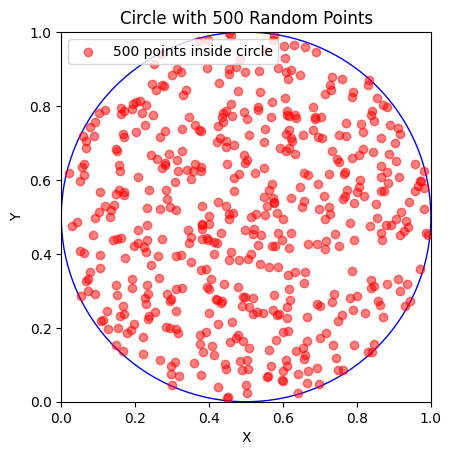

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_random_points_in_circle(num_points=500, diameter=1):
    radius = diameter / 2  # Calculate the radius of the circle
    area_circle = np.pi * radius**2  # Calculate the area of the circle

    # Generate random points until we have exactly num_points inside the circle
    points = []
    while len(points) < num_points:
        # Generate random polar coordinates (r, theta)
        r = radius * np.sqrt(np.random.uniform(0, 1, num_points))
        theta = np.random.uniform(0, 2*np.pi, num_points)

        # Convert polar coordinates to Cartesian coordinates (x, y)
        x = r * np.cos(theta) + radius  # Shift x by radius to center the circle
        y = r * np.sin(theta) + radius  # Shift y by radius to center the circle

        # Check which points fall inside the circle (using the circle's area to adjust probability)
        inside_circle = (x - radius)**2 + (y - radius)**2 <= radius**2

        # Append valid points (inside the circle) to the list
        points.extend(list(zip(x[inside_circle], y[inside_circle])))

    # Trim the list to exactly num_points (in case we generated extra points)
    return points[:num_points]

def plot_circle_with_random_points(num_points=500, diameter=1):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw a circle with a specified diameter (1 meter)
    circle = plt.Circle((0.5, 0.5), diameter/2, edgecolor='b', facecolor='none')
    ax.add_artist(circle)

    # Generate exactly num_points random points inside the circle
    points = generate_random_points_in_circle(num_points, diameter)

    # Unzip the list of points into separate x and y arrays
    x, y = zip(*points)

    # Plot random points inside the circle
    ax.scatter(x, y, color='r', alpha=0.5, label=f'{num_points} points inside circle')

    # Set plot limits and aspect ratio to make the circle look like a circle
    ax.set_xlim(0, diameter)
    ax.set_ylim(0, diameter)
    ax.set_aspect('equal')  # Equal scaling ensures the circle is drawn as a circle

    # Add legend and labels
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Circle with {num_points} Random Points')

    # Show the plot
    plt.show()

# Define the number of points and circle diameter
num_points = 500
diameter = 1  # Diameter of 1 meter

# Plot the circle with exactly 500 random points uniformly distributed inside
plot_circle_with_random_points(num_points, diameter)

In [3]:
import pandas as pd

# Suppose we have three pandas Series representing wake values
wake_data_1 = pd.Series([15, 5, 10])
wake_data_2 = pd.Series([25, 30, 35])
wake_data_3 = pd.Series([40, 45, 50])

# Create a list of pandas Series
wake_data = [wake_data_1, wake_data_2, wake_data_3]

# Sort each dataset
sorted_data = [data.sort_values() for data in wake_data]

# Concatenate the sorted pandas Series along rows (axis=0)
combined_wake_values = pd.concat(sorted_data)

# Compute the average of the combined wake values by index position
average_wake_values = combined_wake_values.groupby(level=0).mean()

# Compute the average of the combined wake values by index position
average_wake_values_not = combined_wake_values.mean()

print("Wake Values:")
print(wake_data)
print("Sorted Wake Values:")
print(sorted_data)
print("Combined and Sorted Wake Values:")
print(combined_wake_values)
print("Average Wake Values by Index:")
print(average_wake_values)
print("Average Wake Values by Index:")
print(average_wake_values)
print("Average Wake Values without")
print(average_wake_values_not)

Wake Values:
[0    15
1     5
2    10
dtype: int64, 0    25
1    30
2    35
dtype: int64, 0    40
1    45
2    50
dtype: int64]
Sorted Wake Values:
[1     5
2    10
0    15
dtype: int64, 0    25
1    30
2    35
dtype: int64, 0    40
1    45
2    50
dtype: int64]
Combined and Sorted Wake Values:
1     5
2    10
0    15
0    25
1    30
2    35
0    40
1    45
2    50
dtype: int64
Average Wake Values by Index:
0    26.666667
1    26.666667
2    31.666667
dtype: float64
Average Wake Values by Index:
0    26.666667
1    26.666667
2    31.666667
dtype: float64
Average Wake Values without
28.333333333333332


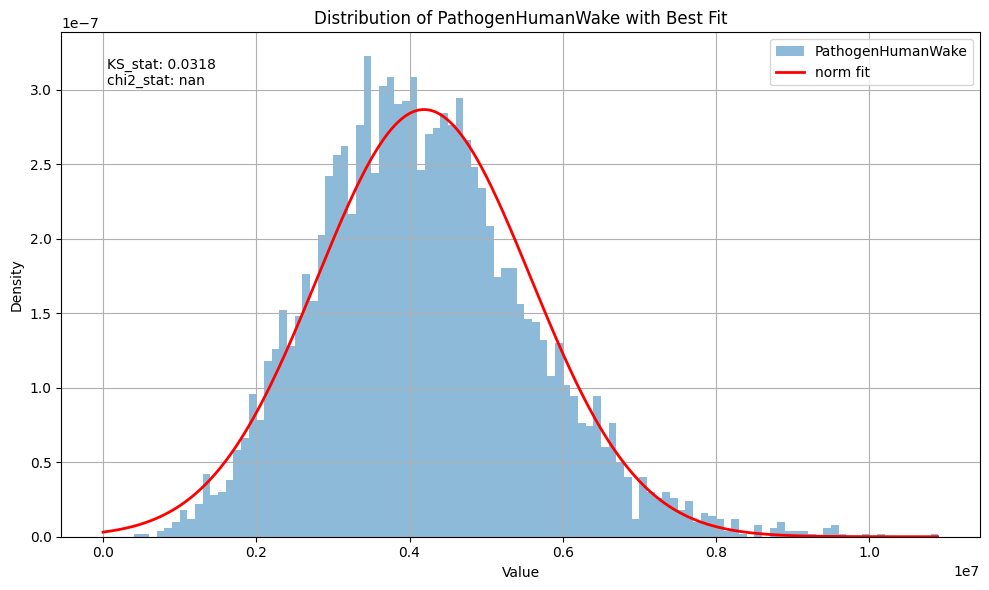

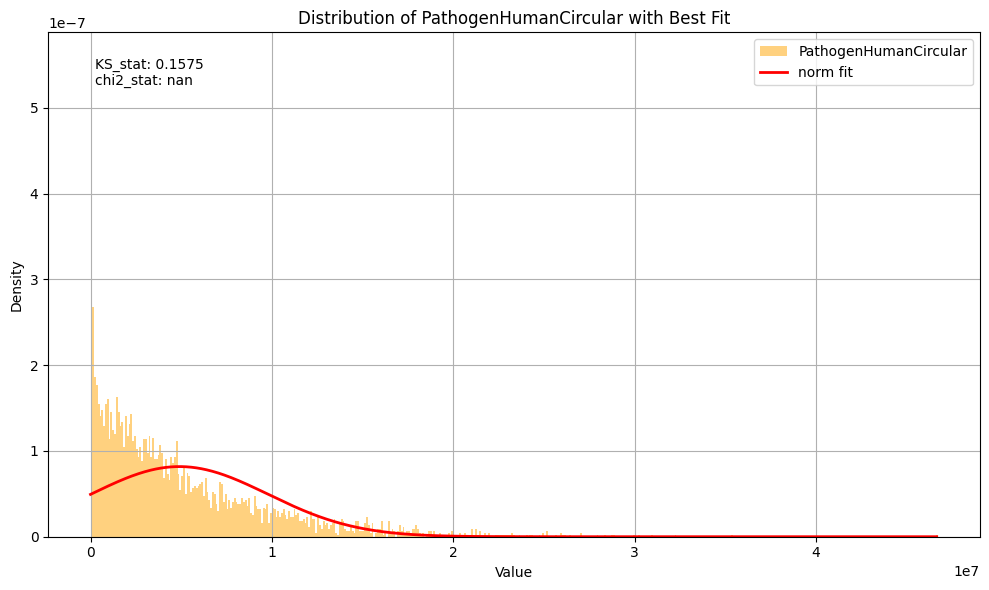

PathogenHumanWake histogram path:
/content/histograms_non_zeros/pathogen_human_wake_histogram.png
PathogenHumanCircular histogram path:
/content/histograms_non_zeros/pathogen_human_circular_histogram.png
Best fit distribution for PathogenHumanWake: norm
Test results for PathogenHumanWake:
          KS_stat  chi2_stat
norm     0.031765        NaN
expon    0.317293        NaN
gamma    0.008827        NaN
lognorm  0.007904        NaN
Best fit distribution for PathogenHumanCircular: norm
Test results for PathogenHumanCircular:
          KS_stat  chi2_stat
norm     0.157462        NaN
expon    0.044503        NaN
gamma    0.049816        NaN
lognorm  0.046921        NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

# Define the folder to save the histogram images
histograms_folder = '/content/histograms_non_zeros'
os.makedirs(histograms_folder, exist_ok=True)

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData.xlsx?raw=true'
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerRawData-2400.xlsx?raw=true'#2400 sec
df = pd.read_excel(excel_file)

# Remove zero values from PathogenHumanWake
df_non_zero_wake = df[df['PathogenHumanWake'] != 0]

# Remove zero values from PathogenHumanCircular
df_non_zero_circular = df[df['PathogenHumanCircular'] != 0]

# Concatenate non-zero data from different scenarios for PathogenHumanWake and PathogenHumanCircular
concatenated_data_wake = pd.concat([group['PathogenHumanWake'] for _, group in df_non_zero_wake.groupby('Scenario')], axis=0)
concatenated_data_circular = pd.concat([group['PathogenHumanCircular'] for _, group in df_non_zero_circular.groupby('Scenario')], axis=0)

# Define candidate distributions (add more distributions as needed)
distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'chi2', 'weibull_max']#

# Initialize dictionaries to store results
results_wake = {}
results_circular = {}

# Fit distributions and calculate test statistics for PathogenHumanWake
for dist_name in distributions:
    dist_params_wake = getattr(stats, dist_name).fit(concatenated_data_wake)
    ks_stat_wake = stats.kstest(concatenated_data_wake, dist_name, args=dist_params_wake)[0]
    chi2_stat_wake = np.nan
    try:
        expected_freq_wake = stats.norm.pdf(np.histogram(concatenated_data_wake, bins=100)[1][:-1], *dist_params_wake[:2]) * len(concatenated_data_wake)
        observed_freq_wake = np.histogram(concatenated_data_wake, bins=100)[0]
        chi2_stat_wake = stats.chisquare(observed_freq_wake, f_exp=expected_freq_wake[:len(observed_freq_wake)])[0]
    except ValueError:
        pass
    results_wake[dist_name] = {'KS_stat': ks_stat_wake, 'chi2_stat': chi2_stat_wake}

# Fit distributions and calculate test statistics for PathogenHumanCircular
for dist_name in distributions:
    dist_params_circular = getattr(stats, dist_name).fit(concatenated_data_circular)
    ks_stat_circular = stats.kstest(concatenated_data_circular, dist_name, args=dist_params_circular)[0]
    chi2_stat_circular = np.nan
    try:
        expected_freq_circular = stats.norm.pdf(np.histogram(concatenated_data_circular, bins=100)[1][:-1], *dist_params_circular[:2]) * len(concatenated_data_circular)
        observed_freq_circular = np.histogram(concatenated_data_circular, bins=100)[0]
        chi2_stat_circular = stats.chisquare(observed_freq_circular, f_exp=expected_freq_circular[:len(observed_freq_circular)])[0]
    except ValueError:
        pass
    results_circular[dist_name] = {'KS_stat': ks_stat_circular, 'chi2_stat': chi2_stat_circular}

# Find the best-fit distribution for each dataset
best_fit_wake = min(results_wake, key=lambda x: results_wake[x]['KS_stat'] + results_wake[x]['chi2_stat'])
best_fit_circular = min(results_circular, key=lambda x: results_circular[x]['KS_stat'] + results_circular[x]['chi2_stat'])
# # Find the best-fit distribution for each dataset based on the lowest KS statistic
# best_fit_wake = min(results_wake, key=lambda x: results_wake[x]['KS_stat'])
# best_fit_circular = min(results_circular, key=lambda x: results_circular[x]['KS_stat'])

# Plot histogram and best-fit distribution for PathogenHumanWake
plt.figure(figsize=(10, 6))
plt.hist(concatenated_data_wake, bins=range(0, int(concatenated_data_wake.max()) + 100000, 100000), alpha=0.5, label='PathogenHumanWake', density=True)
x = np.linspace(0, concatenated_data_wake.max(), 1000)
y = getattr(stats, best_fit_wake).pdf(x, *getattr(stats, best_fit_wake).fit(concatenated_data_wake)[:2])
plt.plot(x, y, 'r-', lw=2, label=best_fit_wake + ' fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of PathogenHumanWake with Best Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Add text annotations for test statistics
plt.text(0.05, 0.95, f'KS_stat: {results_wake[best_fit_wake]["KS_stat"]:.4f}\nchi2_stat: {results_wake[best_fit_wake]["chi2_stat"]:.4f}', transform=plt.gca().transAxes, verticalalignment='top')

# Save the image
wake_hist_path = os.path.join(histograms_folder, 'pathogen_human_wake_histogram.png')
plt.savefig(wake_hist_path, dpi=300)

plt.show()

# Plot histogram and best-fit distribution for PathogenHumanCircular
plt.figure(figsize=(10, 6))
plt.hist(concatenated_data_circular, bins=range(0, int(concatenated_data_circular.max()) + 100000, 100000), alpha=0.5, label='PathogenHumanCircular', color='orange', density=True)
x = np.linspace(0, concatenated_data_circular.max(), 1000)
y = getattr(stats, best_fit_circular).pdf(x, *getattr(stats, best_fit_circular).fit(concatenated_data_circular)[:2])
plt.plot(x, y, 'r-', lw=2, label=best_fit_circular + ' fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of PathogenHumanCircular with Best Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Add text annotations for test statistics
plt.text(0.05, 0.95, f'KS_stat: {results_circular[best_fit_circular]["KS_stat"]:.4f}\nchi2_stat: {results_circular[best_fit_circular]["chi2_stat"]:.4f}', transform=plt.gca().transAxes, verticalalignment='top')

# Save the image
circular_hist_path = os.path.join(histograms_folder, 'pathogen_human_circular_histogram.png')
plt.savefig(circular_hist_path, dpi=300)

plt.show()

# Print the paths of saved histogram images
print("PathogenHumanWake histogram path:")
print(wake_hist_path)
print("PathogenHumanCircular histogram path:")
print(circular_hist_path)

# Print the test results for PathogenHumanWake
print("Best fit distribution for PathogenHumanWake:", best_fit_wake)
print("Test results for PathogenHumanWake:")
print(pd.DataFrame.from_dict(results_wake).transpose())

# Print the test results for PathogenHumanCircular
print("Best fit distribution for PathogenHumanCircular:", best_fit_circular)
print("Test results for PathogenHumanCircular:")
print(pd.DataFrame.from_dict(results_circular).transpose())

In [4]:
import pandas as pd

# Suppose we have three pandas Series representing wake values
wake_data_1 = pd.Series([15, 5, 10])
wake_data_2 = pd.Series([25, 30, 35])
wake_data_3 = pd.Series([40, 45, 50])

# Create a list of pandas Series
wake_data = [wake_data_1, wake_data_2, wake_data_3]

# Sort each dataset
sorted_data = [data.sort_values() for data in wake_data]

# Concatenate the sorted pandas Series along rows (axis=0)
combined_wake_values = pd.concat(sorted_data)

# Reset the index to create a new sequential index
combined_wake_values = combined_wake_values.reset_index(drop=True)

# Compute the mean of the combined wake values
average_wake_values = combined_wake_values.mean()

print("Wake Values:")
print(wake_data)
print("Sorted Wake Values:")
print(sorted_data)
print("Combined and Sorted Wake Values:")
print(combined_wake_values)
print("Average Wake Values based on Data Location:")
print(average_wake_values)

Wake Values:
[0    15
1     5
2    10
dtype: int64, 0    25
1    30
2    35
dtype: int64, 0    40
1    45
2    50
dtype: int64]
Sorted Wake Values:
[1     5
2    10
0    15
dtype: int64, 0    25
1    30
2    35
dtype: int64, 0    40
1    45
2    50
dtype: int64]
Combined and Sorted Wake Values:
0     5
1    10
2    15
3    25
4    30
5    35
6    40
7    45
8    50
dtype: int64
Average Wake Values based on Data Location:
28.333333333333332


## 5. **Links**

/content/mass-gathering-project-421115-bc8b850bf99a.json

https://chat.openai.com/share/d6c66a48-e1b8-4417-b8cc-056e50f24076

https://drive.google.com/drive/u/0/folders/1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj

https://docs.google.com/presentation/d/1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8/edit#slide=id.SLIDES_API1959664783_0